In [6]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [7]:
# SE CARGA TROCAFONE SOLO 1 VEZ.

tf = pd.read_csv('data/events.csv',dtype=object)

### Se agregan al dataframe columnas con el tiempo

In [8]:
# Agregamos nuevas columnas para trabajar mejor con el tiempo. (mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear
tf['timestamp_hour'] = tf['timestamp_datetime'].dt.hour
tf['timestamp_week'] = tf['timestamp_datetime'].dt.week

# En este notbook se encuentra: 
    -Parte 1: Información general del data set
    -Parte 2: Información específica de cada evento
    

# --------- NUEVAS CONVENCIONES ----------

-tf:  set de datos. 

-Secciones grandes: representa cómo trabajamos la información.

1) Introducción al data set

2) Análisis de los eventos por separado

3) Cruce de información entre varios eventos

... 

-Con un # se indican las secciones grandes y con ## las subsecciones. Las subscciones de las
subsecciones se indican con **

-Trabajamos con el modelo pregunta respuesta -> lo más que se pueda

-Al principio, se hicieron cortes según el evento -> NO REPETIR ESTOS CORTES PARA NO CARGAR LA RAM.

-tratar de guardar en variables los cortes y no repetirlos en los gráficos en cada una de las variables -> PARA NO CARGAR LA RAM

-El análisis de null está hecho al principio, no hace falta repetirlos aunque está bueno referenciar la sección en la que se encuentra y confirmar el número.

-TENER EXTREMO CUIDADO CON EL ÚSO DE LOS ÍNDICES, LUEGO NOS AYUDARAN A REALIZAR EL INFORME. 

------------------------------------------------------------------------------------------


# 1) Breve descripcion del dataset



## 1.1) Análisis preliminar de dataset

**1.1.1) Cantidad de columnas**

In [27]:
print(len(tf))
tf.columns

1011288


Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'timestamp_datetime',
       'timestamp_month', 'timestamp_day', 'timestamp_weekday',
       'timestamp_dayofyear', 'timestamp_hour'],
      dtype='object')

**1.1.2) Muestra de las primeras filas**

In [8]:
tf.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,timestamp_datetime,timestamp_month,timestamp_day,timestamp_weekday,timestamp_dayofyear,timestamp_hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:05,5,31,Thursday,151,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,5,31,Thursday,151,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:09,5,31,Thursday,151,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:40,5,31,Thursday,151,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,2018-05-29 13:29:25,5,29,Tuesday,149,13


**1.1.3) Informacion estadistica dataset **

In [9]:
#ESTO NO DA INFORMACIÓN SOBRE EL DATA SET -> ES INFORMACIÓN ESTADÍASTICA
tf.describe()

,timestamp_month,timestamp_day,timestamp_dayofyear,timestamp_hour
count,"1,011,288.00","1,011,288.00","1,011,288.00","1,011,288.00"
mean,4.84,15.21,130.59,13.35
std,1.11,8.77,32.06,7.38
min,1.00,1.00,1.00,0.00
25%,4.00,8.00,120.00,9.00
50%,5.00,15.00,140.00,15.00
75%,6.00,23.00,153.00,19.00
max,6.00,31.00,166.00,23.00


**1.1.4) Tipos de datos de las columnas **

In [10]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 29 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

## 1.2) Análisis de los eventos
Los eventos representan cada fila de nuestro dataset

**1.2.1) Nombre de los eventos**

In [11]:
tf['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

**1.2.2) ¿Cuál es la ocurrencia de los eventos?**

Text(0,0.5,'Eventos')

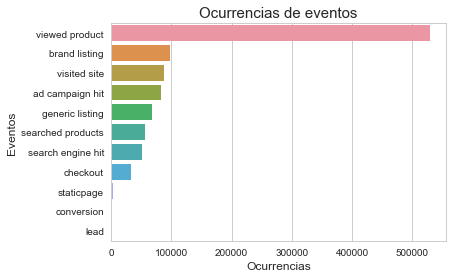

In [26]:
g = sns.barplot(x=tf['event'].value_counts().values, y=tf['event'].value_counts().index, orient='h')
g.set_title("Ocurrencias de eventos", fontsize=15)
g.set_xlabel("Ocurrencias", fontsize=12)
g.set_ylabel("Eventos", fontsize=12)
#plt.savefig('ocurencias_eventos.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight')


** 1.2.3) Ocurrencia total de eventos por horario **

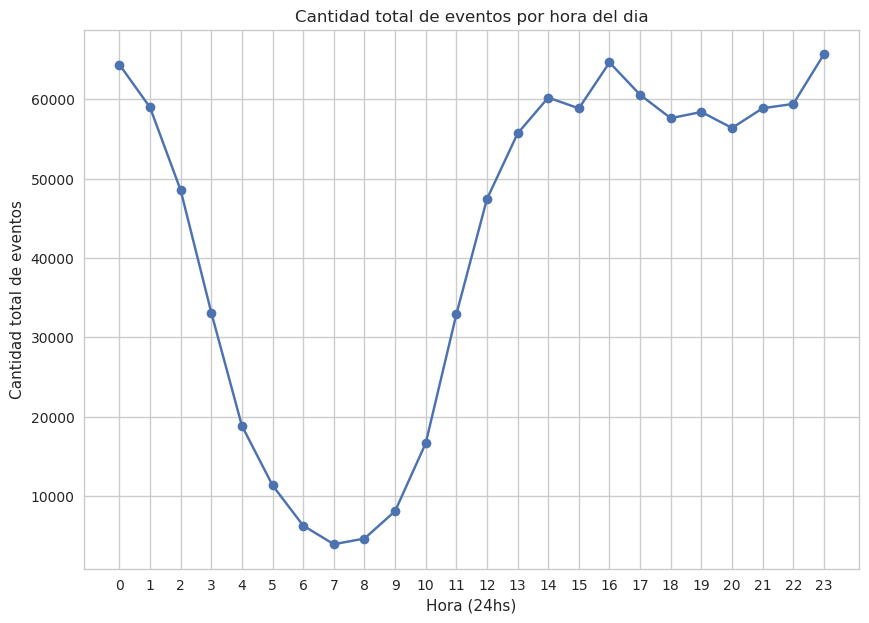

In [36]:
tf_hr = tf.filter(items = ['country','timestamp_datetime', 'event'])

tf_hr['hour'] = tf_hr['timestamp_datetime'].dt.hour

g = tf_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(10, 7), grid=True, style="-o")
g.set(xlabel='Hora (24hs)', ylabel='Cantidad total de eventos', title='Cantidad total de eventos por hora del dia')

plt.xticks(range(0, 24));

## 1.3) Análisis de los elementos null

**1.3.1) ¿Hay eventos nulos en la columna event?**

In [37]:
tf['event'].isnull().sum()

0

**1.3.2) ¿Hay fechas nulas?**

In [38]:
tf['timestamp'].isnull().any()

False

**1.3.3) ¿Qué campos son obligatorios para cada evento? **

Hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

In [39]:
rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
timestamp,0,0,0,0,0,0,0,0,0,0,0
person,0,0,0,0,0,0,0,0,0,0,0
url,71,98635,33735,1172,67534,448,50957,56073,3598,528931,87378
sku,82827,98635,0,0,67534,448,50957,56073,3598,0,87378
model,82827,98635,2,0,67534,0,50957,56073,3598,0,87378
condition,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
storage,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
color,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
skus,82827,311,33735,1172,113,448,50957,119,3598,528931,87378
search_term,82827,98635,33735,1172,67534,448,50957,7106,3598,528931,87378


**Los campos obligatorios son: **


(los eventos hora, mes y nombre de dia son comunes a todos porque timestamp es comun a todos y todos los timestamp tiene información en el formato correcto)


Para el evento **viewed product**: timestamp | person | sku | model | condition | storage | color.

Para el evento **brand listing**: timestamp | person | skus -> **analizar los 311 skus null**

Para el evento **visited site**: channel | new_vs_returning | city | region | country | device_tipe | screen resolution | operating system version | browser version

Para el evento **ad campaing hit**: timestap | person | url | campaing_sourse -> **analizar que sucede con los 71 null que aparecen url , y los 31 que aparecen en campaing_source y eliminarlos si no sirve**

Para el evento **generic listing**: timestamp | person | skus ->**analizar que sucede con los 113 null que aparecen en skus**

Para el evento **serched product**: timestamp | person | skus | search_term -> **analizar que sucede con los 119 null que aparecen skus y 7106 null que aparecen en search_term**

Para el evento **serched engine**: timestamp | person | search engine

Para el evento **checked out**: timestamp | person | sku | color | storage | model | condition -> **analizar que sucede con los 2 null que aparecen en: color, storage, model, condition**

Para el evento **static page**: timestamp | person | satatic page

Para le evento **conversion**: timestamp | person | sku | model | color | condition | storage

Para el evento **lead**: timestamp | person | model

Esto lo deducimos porque si la cantidad de apariciones de cada evento es igual a la cantidad de nulls que tiene en una columna -> esa columna no representa nada para el evento. 

# 2) Análisis por evento

La idea de esta sección es analizar por evento. En primera instancia se analiza la relación de los eventos con cada una de sus columnas obligatorias y luego aumentamos la correlación entre las columnas. 


** Hago todas las particiones en una sóla linea para evitar repetición de código (uso snake case) ** 

In [12]:
viewed_product = tf[tf['event'] == 'viewed product']
brand_listing    = tf[tf['event'] == 'brand listing']
visited_site =  tf[tf['event'] == 'visited site']
ad_campaign_hit = tf[tf['event'] == 'ad campaign hit']
generic_listing = tf[tf['event'] == 'generic listing']
searched_products = tf[tf['event'] == 'searched products']
search_engine_hit = tf[tf['event'] == 'search engine hit']
checkout = tf[tf['event'] == 'checkout']
staticpage = tf[tf['event'] == 'staticpage']
conversion = tf[tf['event'] == 'conversion']
lead = tf[tf['event'] == 'lead']

## 2.1) Viewed product 
Este evento representa: "El usuario visita una página de producto"

** 2.1.1) ¿Cuál fueron los modelos de celulares mas visitados? **

In [114]:
# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

iPhone 6                                     47538
iPhone 5s                                    42045
iPhone 6S                                    36930
iPhone 7                                     26330
Samsung Galaxy S7 Edge                       23062
Samsung Galaxy S7                            18085
iPhone 7 Plus                                17853
iPhone SE                                    15874
Samsung Galaxy S8                            15868
iPhone 6S Plus                               12250
iPhone 6 Plus                                12098
iPhone 5c                                    12049
Samsung Galaxy J5                            11036
Samsung Galaxy S6 Flat                       10724
Samsung Galaxy S6 Edge                       10580
Samsung Galaxy S8 Plus                       10006
iPhone 5                                      8846
Samsung Galaxy J7 Prime                       8400
Motorola Moto G4 Plus                         7522
Motorola Moto X Play 4G Dual   

Se analizaron los 15 celulares más visitados

In [115]:
# 15 celulares mas visitados.
modelos_viewed = viewed_product['model'].value_counts().head(15)

Text(0,0.5,'Celulares')

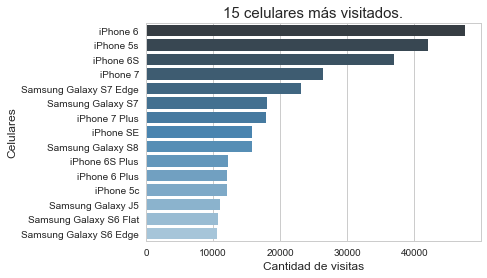

In [57]:
# Grafico de barras de los 15 celulares mas visitados.

g = sns.barplot(x=modelos_viewed, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g.set_title("15 celulares más visitados.", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Celulares", fontsize=12)

**2.1.2) ¿Cuáles fueron los 15 colores más requeridos?**

Preto                             0.23
Dourado                           0.20
Cinza espacial                    0.12
Branco                            0.10
Prateado                          0.09
Ouro Rosa                         0.06
Prata                             0.03
Rosa                              0.03
Preto Matte                       0.03
Azul                              0.02
Ametista                          0.01
Platinum                          0.01
Preto Brilhante                   0.01
Ouro                              0.01
Vermelho                          0.01
Name: color, dtype: float64


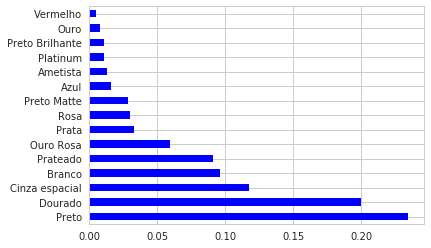

In [18]:
productosColorGraf = viewed_product.color.value_counts(normalize = True).head(15)
print(productosColorGraf)
productosColorGraf.plot(kind = 'barh',color = 'blue')

Las visitas según el color de los celulares fue:
    - el 23% de las visitas es hacia productos negros
    - el 20% de las visitas es hacia productos dorados
    - el 11% de de las visitas es hacia productos gris espacial
    - el 10% de de las visitas es hacia productos blancos
    - el 9% de de las visitas es hacia productos plateados
    - El 6% de de las visitas es hacia productos rosas 
Despreciamos el resto de los colores ya que el porcentaje de visitas es poco significativo. 

**2.1.3) ¿Cuál es el almacenamiento de los modelos que los usuarios visitaron?**

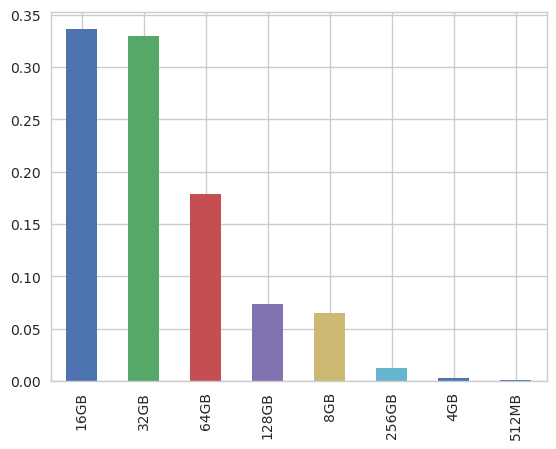

In [46]:
productosStorageGraf = viewed_product.storage.value_counts(normalize = True)
productosStorageGraf.plot(kind = 'bar')

Conclusión de los productos que visitó el usuario sobre el almacenamiento de los productos: 


    - El 33% visita productos con almacenamiento de 16 GB
    - El 32% visita productos con almacenamiento de 32 GB
    - El 17% visita productos con almacenamiento de 64 GB
    - EL 6% visita productos con almacenamiento de 8 GB
    

**2.1.4) ¿Cuáles fueron las condiciones de los modelos que los usuarios visitaron?**

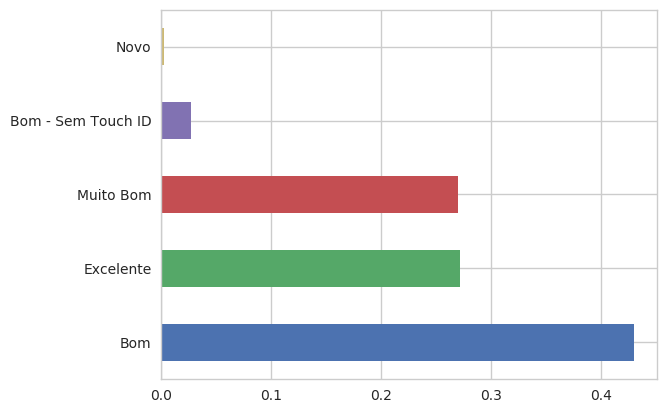

In [47]:
productosCondicionesGraf = viewed_product.condition.value_counts(normalize = True)
#print(productosCondicionesGraf)
productosCondicionesGraf.plot(kind = 'barh')

    -el 0,02 porciento de los productos que visita el usuario son nuevos
         
    -el 2% de los productos que tienen identificador de huella digital 
    
    -el 42% de los productos son de calidad buena
    
    -el 27% de los productos son de calidad excelente 
    
    -el 27% de los productos son de calidad muy buena

**2.1.5) ¿En qué momento del día los usuarios visitaron los modelos?**

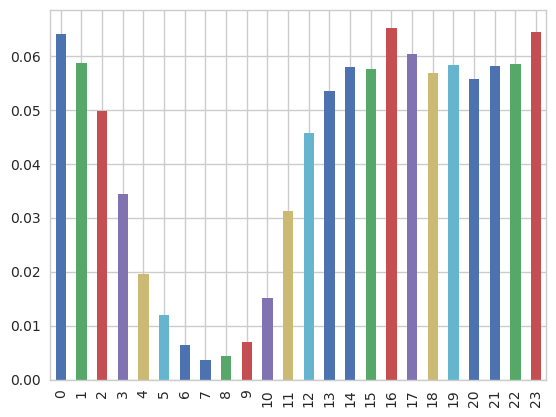

In [48]:
productosTimeStampGraf = viewed_product.timestamp_hour.value_counts(normalize = True, sort = False)
productosTimeStampGraf.plot(kind = 'bar')

Los modelos se visitan más frecuentemente entre las 14hs y las 2hs.

**2.1.6) ¿Qué días se visitaron más productos?**

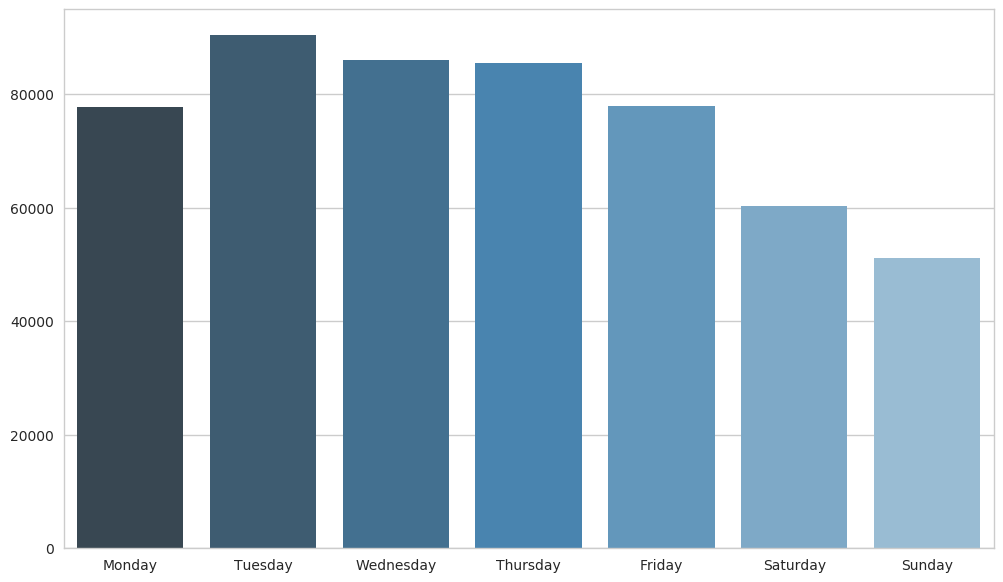

In [49]:
fig, ax = plt.subplots(figsize=(12,7))
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total = viewed_product['timestamp_weekday'].value_counts().reindex(dias)
g = sns.barplot(x=total.index, y=total.values, palette="Blues_d", orient='v', ax=ax)


    -El día que menos productos se visitan son los domingos, seguido por los sábados

**2.1.7)¿En qué meses se visitaron más productos?**

Text(0.5,1,'Viewed product por mes')

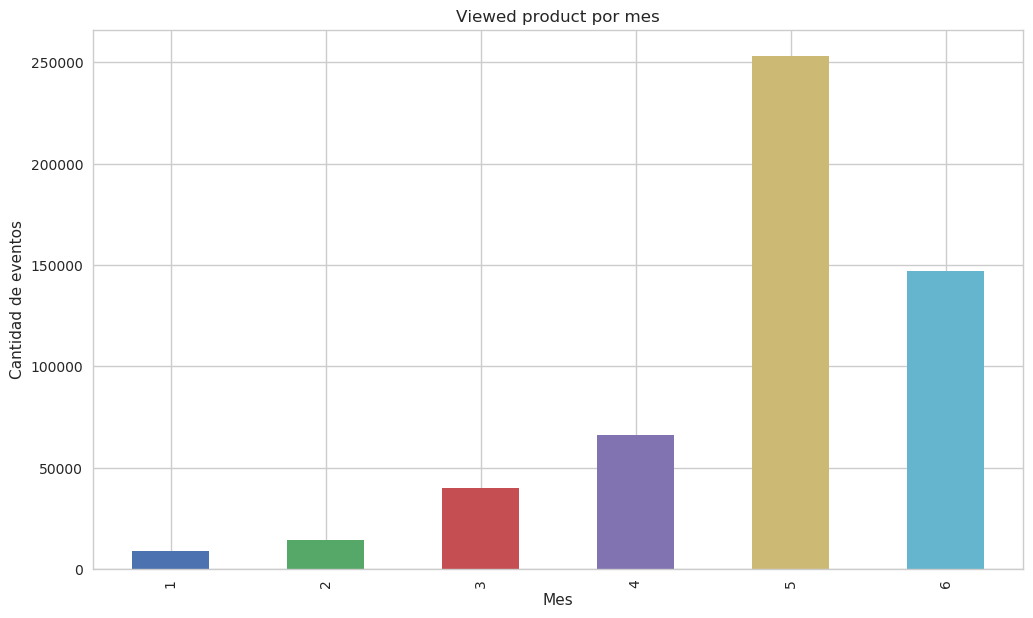

In [50]:
g = viewed_product.groupby('timestamp_month').size()\
                        .plot(kind='bar', figsize=(12,7))
g.set_xlabel("Mes")
g.set_ylabel('Cantidad de eventos')
g.set_title('Viewed product por mes')
#g.legend(['Viewed product']);


  -el 47% de los productos se visitaron en Mayo
  
  -el 27% de los productos se visitaron en Junio (cayó respecto a Mayo) **ESTO SE PUEDE DEBER AL HECHO DE QUE NO ESTÁN TODOS LOS DÍAS DE JUNIO SINO LA PRIMERA QUINCENA **
  
  -el 13% de los productos se visitaron en Abril
  
  -el 7% de los productos se visitaron en marzo
  
  -el 2% de los productos se visitaron en Febrero
  
  -el 1% de los productos se visitaron en Enero


**2.1.8)¿Cuáles fueron las visitas para cada modelo según el color?**

In [11]:
# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'event':'count'})
visitas_por_color.columns = ['visitas']

NameError: name 'viewed_product' is not defined

**2.1.9) Según la información de 2.1.1 y de 2.1.8 , ¿cuáles fueron los 5 colores más solicitados de los 5 celulares más buscados?** 


In [9]:
visitas_por_color.reset_index(inplace = True)
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_color = visitas_por_color.loc[visitas_por_color['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_color = cel_mas_visitados_por_color.groupby(['model','color']).agg({'visitas':sum})
cel_mas_visitados_por_color = cel_mas_visitados_por_color.sort_values(['model','visitas'],ascending=False).groupby('model').head(5)
cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

NameError: name 'visitas_por_color' is not defined

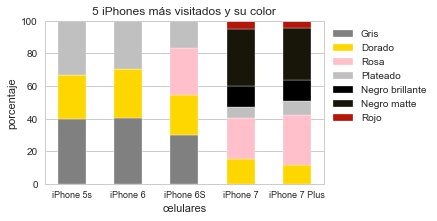

In [42]:
r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones más visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


**2.1.10) ¿Cuáles fueron las visitas de cada modelo según su capacidad de almacenamiento?**

In [43]:
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'event':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

visitas
model                     storage         
Asus Live                 16GB           4
Asus Zenfone 2            16GB          95
                          32GB          35
                          64GB           8
Asus Zenfone 2 Deluxe     128GB        201
Asus Zenfone 2 Laser      16GB          12
Asus Zenfone 3 Max  32 GB 32GB         124
Asus Zenfone 3 Max 16 GB  16GB         141
Asus Zenfone 3 Zoom       128GB          1
                          32GB          16
                          64GB          25
Asus Zenfone 5            8GB          720
Asus Zenfone 6            8GB          583
Asus Zenfone Go           16GB           9
Asus Zenfone Selfie       32GB          49
LG  X Screen              16GB         283
LG G3 Beat D724           8GB          304
LG G3 D855                16GB        1065
LG G3 Stylus D690         8GB          251
LG G4 Beat H736           8GB          312
LG G4 H815P               32GB         539
LG G4 H818P               32GB        1266
LG G4 Stylus H630         16GB         106
LG G4 Stylus HDTV H540T   16GB         133
LG G5 SE                  32GB        1143
LG G6                     32GB          93
LG K10                    16GB         236
LG K10 Novo               32GB         816
LG K10 TV                 16GB         795
LG K4                     8GB           53
...                                    ...
iPhone 6                  128GB       6218
                          16GB       25915
                          64GB       15405
iPhone 6 Plus             128GB       1015
                          16GB        7080
                          64GB        4003
iPhone 6S                 128GB       3506
                          16GB       16530
                          32GB        5563
                          64GB       11331
iPhone 6S Plus            128GB       1989
                          16GB        5111
                          32GB        1055
                          64GB        4095
iPhone 7                  128GB      11175
                          256GB       2187
                          32GB       12968
iPhone 7 Plus             128GB       9797
                          256GB       2840
                          32GB        5216
iPhone 8                  256GB        372
                          64GB         625
iPhone 8 Plus             256GB        595
                          64GB         553
iPhone SE                 128GB        512
                          16GB        7075
                          32GB        1592
                          64GB        6695
iPhone X                  256GB        556
                          64GB         138

[281 rows x 1 columns]

**2.1.11)¿Cuáles fueron los almacenamientos de los 5 celulares más buscados?**

In [44]:
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

storage,128GB,16GB,256GB,32GB,64GB
model,,,,,
Samsung Galaxy S7 Edge,1758,0,0,21304,0
iPhone 5s,0,22080,0,11626,8339
iPhone 6,6218,25915,0,0,15405
iPhone 6S,3506,16530,0,5563,11331
iPhone 7,11175,0,2187,12968,0


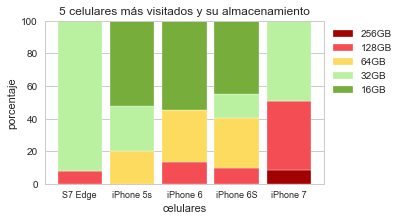

In [46]:
r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                               , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares más visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

**2.1.12)¿Cuáles fueron las visitas de cada modelo según su condicion?**

In [57]:
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'event':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

visitas
model                     condition                  
Asus Live                 Excelente                 4
Asus Zenfone 2            Bom                      73
                          Excelente                25
                          Muito Bom                40
Asus Zenfone 2 Deluxe     Bom                      13
                          Excelente                30
                          Muito Bom               158
Asus Zenfone 2 Laser      Bom                       6
                          Excelente                 2
                          Muito Bom                 4
Asus Zenfone 3 Max  32 GB Bom                       7
                          Excelente                18
                          Muito Bom                99
Asus Zenfone 3 Max 16 GB  Bom                      37
                          Excelente                40
                          Muito Bom                64
Asus Zenfone 3 Zoom       Bom                       1
                          Excelente                10
                          Muito Bom                31
Asus Zenfone 5            Bom                     203
                          Excelente               336
                          Muito Bom               181
Asus Zenfone 6            Bom                     136
                          Excelente               217
                          Muito Bom               230
Asus Zenfone Go           Excelente                 4
                          Muito Bom                 5
Asus Zenfone Selfie       Bom                      24
                          Excelente                 5
                          Muito Bom                20
...                                               ...
iPhone 6 Plus             Bom - Sem Touch ID       26
                          Excelente              3249
                          Muito Bom              4185
iPhone 6S                 Bom                   13295
                          Bom - Sem Touch ID      426
                          Excelente             11571
                          Muito Bom             11638
iPhone 6S Plus            Bom                    5388
                          Bom - Sem Touch ID       23
                          Excelente              3701
                          Muito Bom              3138
iPhone 7                  Bom                   10508
                          Excelente              7701
                          Muito Bom              8121
iPhone 7 Plus             Bom                    4919
                          Excelente              7218
                          Muito Bom              5716
iPhone 8                  Bom                     150
                          Excelente               558
                          Muito Bom               289
iPhone 8 Plus             Bom                     114
                          Excelente               733
                          Muito Bom               301
iPhone SE                 Bom                    5165
                          Bom - Sem Touch ID      568
                          Excelente              5249
                          Muito Bom              4892
iPhone X                  Bom                      58
                          Excelente               356
                          Muito Bom               280

[578 rows x 1 columns]

**2.1.13)¿Cuál fue la relación entre día de la semana y mes?**

In [35]:
# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

timestamp_month,1,2,3,4,5,6
timestamp_weekday,,,,,,
Friday,1415,2040,5946,10368,29950,28228
Monday,1128,1949,5091,11369,36761,21355
Saturday,979,1658,5167,7826,26202,18481
Sunday,805,1240,3723,6907,23317,15169
Thursday,1155,2098,7201,10080,44073,20789
Tuesday,1722,2539,6566,9665,47285,22633
Wednesday,1647,2606,5972,9729,45724,20373


Text(34,0.5,'Día de la visita')

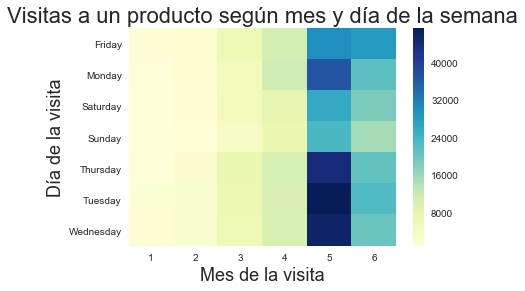

In [36]:
visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto según mes y día de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Día de la visita", fontsize=18)

**2.1.14)¿Cuál fue la relación entre los días y el mes?**

In [32]:
# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

timestamp_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,6.00,122.00,263.00,250.00,510.00,179.00,171.00,210.00,431.00,445.00,...,294.00,317.00,260.00,161.00,298.00,313.00,208.00,252.00,307.00,329.00
2,307.00,407.00,238.00,319.00,464.00,333.00,355.00,277.00,379.00,413.00,...,613.00,814.00,416.00,399.00,737.00,849.00,833.00,nan,nan,nan
3,629.00,739.00,735.00,507.00,755.00,"1,309.00",749.00,956.00,767.00,"1,211.00",...,"2,309.00","1,790.00","1,306.00","1,214.00","1,690.00","2,180.00","1,914.00","2,130.00","1,252.00",866.00
4,805.00,"1,818.00","2,654.00","2,188.00","2,182.00","1,997.00","1,486.00",925.00,"1,892.00","2,481.00",...,"1,154.00","2,081.00","2,446.00","3,084.00","3,731.00","3,655.00","3,164.00","2,545.00","3,812.00",nan
5,"3,702.00","4,231.00","4,623.00","4,362.00","4,031.00","3,496.00","4,802.00","5,589.00","5,662.00","6,556.00",...,"11,380.00","10,077.00","9,375.00","8,976.00","7,555.00","6,516.00","10,359.00","12,552.00","12,587.00","10,767.00"
6,"10,956.00","10,323.00","8,499.00","11,799.00","13,555.00","11,571.00","12,339.00","9,533.00","8,158.00","6,670.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(34,0.5,'Mes de la visita')

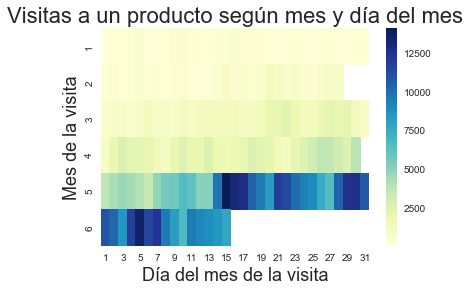

In [33]:
visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto según mes y día del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Día del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

**2.1.15)¿Cómo fueron las visitas según el día del año?**

Text(0.5,0,'Día del año')

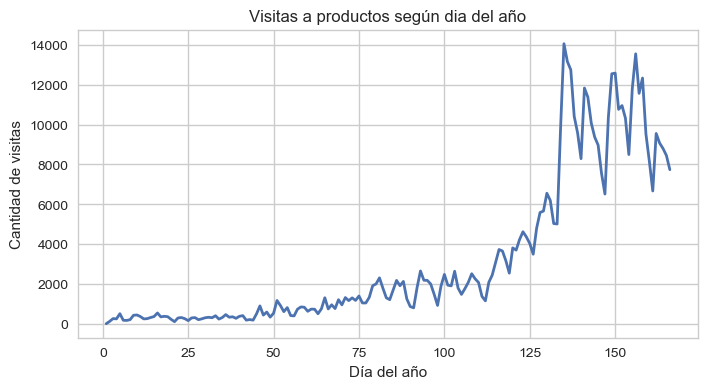

In [117]:
# Visitas a productos segun dia del año
visitas_segun_dia_año = viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))
visitas_segun_dia_año.set_title("Visitas a productos según dia del año")
visitas_segun_dia_año.set_ylabel('Cantidad de visitas')
visitas_segun_dia_año.set_xlabel('Día del año')

### 2.1.16 ¿Cuáles fueron las marcas de celulares más visitadas por semana del año?

In [124]:
vistas = tf[tf['event'] == 'viewed product']
vistas['marca'] = vistas.model.apply(lambda x: str(x).split(" ")[0])
vistas.marca.value_counts()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


iPhone      242014
Samsung     202648
Motorola     59547
LG            9098
Sony          6782
Lenovo        4483
Asus          2023
iPad          1839
Quantum        497
Name: marca, dtype: int64

Text(0.5,1,'Visitas por marca por semana del año')

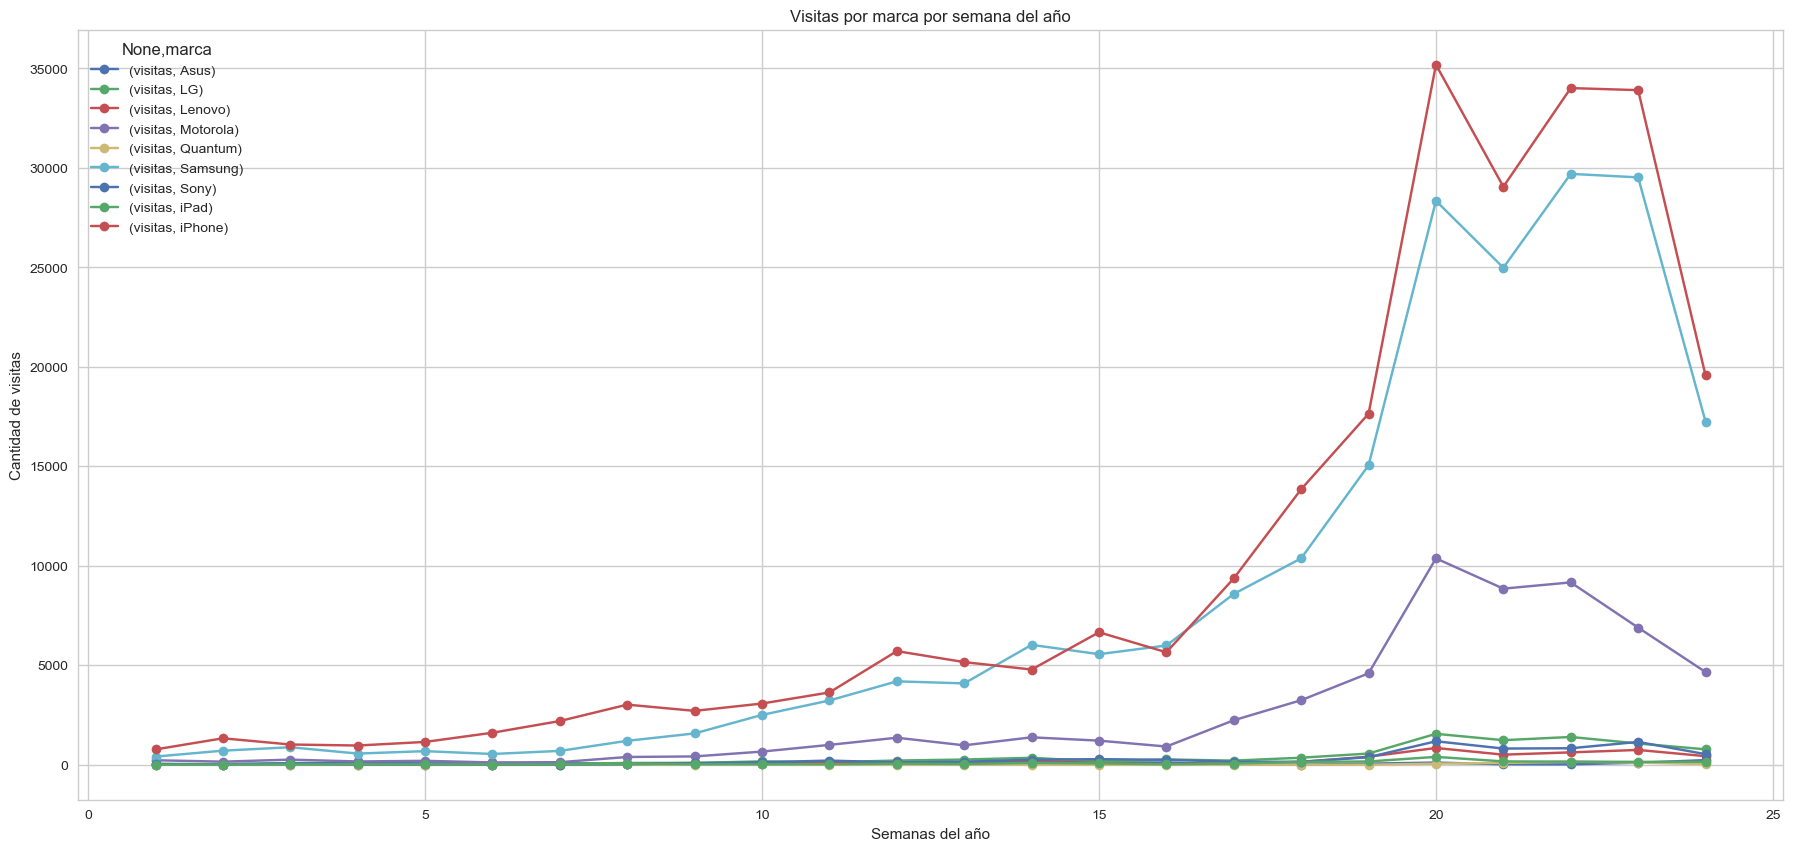

In [125]:
vistas = vistas.groupby('timestamp_week').marca.value_counts().to_frame('visitas')
graf = vistas.unstack('marca').fillna(0).plot(kind = 'line', figsize = (22, 10), style = '-o')
graf.set_xlabel('Semanas del año')
graf.set_ylabel('Cantidad de visitas')
graf.set_title('Visitas por marca por semana del año')

## 2.2) Ad campaign hit

Este evento representa: El usuario ingresa al sitio mediante una campana de marketing online.

La columna cuenta con 31 valores nulos de campain_source (según 1.3.3), asique los puedo descartar. 

**2.2.1)¿Cuáles fueron las campañas publicitarias más populares? **

In [47]:
campanias_populares = ad_campaign_hit['campaign_source'].value_counts()
campanias_populares

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

Text(0,0.5,'Campañas')

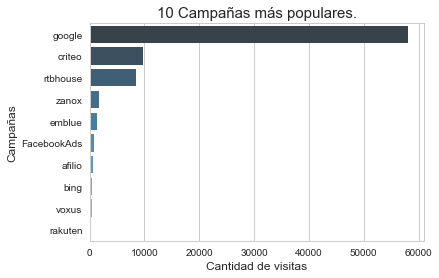

In [49]:

g2 = sns.barplot(x=campanias_populares.head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas más populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

**2.2.2)¿Cuáles fueron las campañas publicitarias más populares según el mes?**

In [50]:
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

campaign_source,Facebook,FacebookAds,FacebookSocial,Google Social,MARKETING SOCIAL,afiliado,afilio,bing,blog,buscape,...,indexa,manifest,mercadopago,onsite,rakuten,rtbhouse,socialmedia,voxus,yotpo,zanox
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,0,59,3,0,0,0,101,16,1,33,...,6,1,0,0,0,136,1,0,1,70
2,2,63,0,0,0,0,26,11,0,44,...,1,0,0,3,0,274,0,0,0,62
3,12,208,0,0,0,8,55,52,13,62,...,13,2,0,0,0,717,0,0,0,157
4,6,15,0,0,0,5,94,53,11,0,...,8,31,0,0,32,1598,0,0,1,252
5,38,111,5,0,0,14,264,255,5,2,...,81,55,10,0,113,4122,0,320,19,737
6,19,308,0,1,7,7,152,97,7,0,...,45,37,8,0,165,1703,0,112,4,395


Text(0,0.5,'Cantidad de clicks')

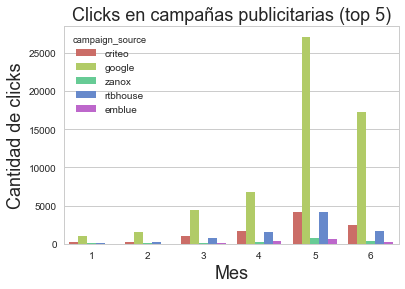

In [51]:
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , data=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

**2.2.3) ¿Cuáles fueron los click por día de las cinco campañas publicitarias más populares?**

Text(0.5,1,'Cantidad de clicks en el top5 de publiciades según los días del año')

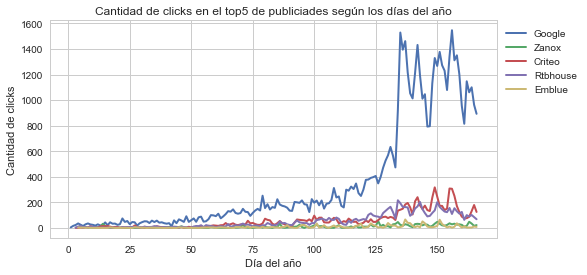

In [54]:
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')
plt.xlabel('Día del año')
plt.title('Cantidad de clicks en el top5 de publiciades según los días del año')

**2.2.4)¿Cuáles fueron las URL más accedidas? -> HACER ESTE ANÁLISIS ES MUY IMPORTANTE**

En base a esto, podemos ver qué urls son las más accedidas, en función de eso podemos ver qué productos fueron los más accedidos. Estos son distintos a los de Viewed Product, ya que son los productos más accedidos según una publicidad. 

In [97]:
ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')

**2.2.6)¿Cuántas personas entraron a vender versus las personas que entraron a comprar?**

In [136]:
ad_campaign_hit_url_ventas = ad_campaign_hit.url.dropna().to_frame()
ad_campaign_hit_url_ventas = ad_campaign_hit_url_ventas.loc[ad_campaign_hit_url_ventas.url.str.contains('vender')]

ad_campaign_hit_url_compras = ad_campaign_hit.url.dropna().to_frame()
ad_campaign_hit_url_compras = ad_campaign_hit_url_compras.loc[ad_campaign_hit_url_compras.url.str.contains('compra')]
#ad_campaign_hit_url_compras['url'].value_counts().head(10).plot(kind = 'barh') -> NO ES UN BUEN GRÁFICO


print(len(ad_campaign_hit)-len(ad_campaign_hit_url_compras)-len(ad_campaign_hit_url_ventas))
print(len(ad_campaign_hit_url_ventas))
print(len(ad_campaign_hit_url_compras))


28397
221
54209


La cantidad de personas que quiso vender (221) es muchisimo menor que la cantidad de personas que quisieron comprar (54209). 

**2.2.7)¿Qué marca obtuvo más clicks según ventas?**

Text(0,0.5,'Marcas')

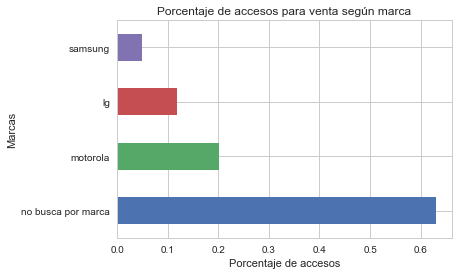

In [141]:
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas['url'].str.split("/",expand = True)
ad_campaign_hit_url_ventas_split
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.loc[:,2:4]
#En este caso los nulls son importantes. Los nulls en la columnas 2 y 3 significan que sólo entró 
#a vender. Los nulls en la fila 3 significa que buscó por marca. 
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.rename(index=str,columns={2: "marca", 3: "modelo"})
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.replace('','no busca por marca')
estadistica_de_ventas_segun_marca = ad_campaign_hit_url_ventas_split['marca'].value_counts(normalize = True)
estadistica_de_ventas_segun_marca = estadistica_de_ventas_segun_marca.plot(kind = 'barh')
estadistica_de_ventas_segun_marca.set_title('Porcentaje de accesos para venta según marca')
estadistica_de_ventas_segun_marca.set_xlabel('Porcentaje de accesos')
estadistica_de_ventas_segun_marca.set_ylabel('Marcas')


**2.2.8)¿Qué modelo tuvo más clicks segun ventas?**

Text(0.5,0,'Modelos')

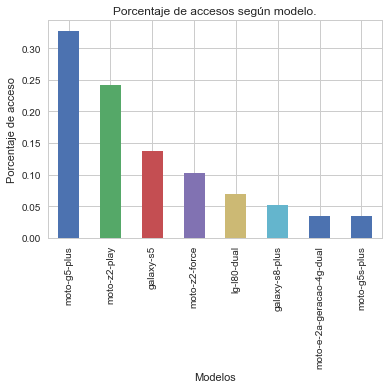

In [142]:
#En este caso los nulls no son importantes. 
ad_campaign_hit_url_ventas_split_modelo = ad_campaign_hit_url_ventas_split['modelo']#.to_frame()
ad_campaign_hit_url_ventas_split_modelo = ad_campaign_hit_url_ventas_split_modelo.dropna().value_counts(normalize = True).plot(kind = 'bar')
ad_campaign_hit_url_ventas_split_modelo.set_title('Porcentaje de accesos según modelo.')
ad_campaign_hit_url_ventas_split_modelo.set_ylabel('Porcentaje de acceso')
ad_campaign_hit_url_ventas_split_modelo.set_xlabel('Modelos')

**2.2.9)¿Qué marca obtuvo más clicks según compras? -> también aparece la opción ofertas y la opción list** 

Text(0,0.5,'marcas')

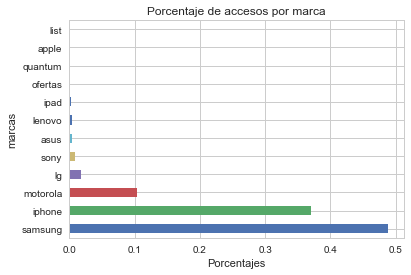

In [144]:
ad_campaign_hit_url_compras_split = ad_campaign_hit_url_compras['url'].str.split("/",expand = True).loc[:,2:3]
ad_campaign_hit_url_compras_split = ad_campaign_hit_url_compras_split.rename(index = str, columns = {2: "marca", 3:"modelo"})
ad_campaign_hit_url_compras_split = ad_campaign_hit_url_compras_split['marca'].value_counts(normalize = True).plot(kind = 'barh')
ad_campaign_hit_url_compras_split.set_title('Porcentaje de accesos por marca')
ad_campaign_hit_url_compras_split.set_xlabel('Porcentajes')
ad_campaign_hit_url_compras_split.set_ylabel('marcas')

**2.2.10)¿Qué modelo obtuvo más clicks según compras? -> NO SE SI VALE LA PENA**

In [71]:
#ESTE ANÁLISIS ES MUCHO MÁS COMPLICADO PORQUE UN MISMO MODELO
#APARECE DE FORMA DISTINTA. EJ: 6S IPHONE 6S
ad_campaign_hit_url_compras_split['modelo'].value_counts()

6s                                 3393
6                                  3228
iphone-5s                          2781
galaxy-j5                          2446
galaxy-s7-edge                     1972
                                   1545
galaxy-s8                          1499
galaxy-j7                          1465
galaxy-s6-edge                     1415
galaxy-s7                          1139
7                                  1120
galaxy-s6-flat                     1067
iphone-6s-plus                      949
samsung-gran-prime-duos-tv          944
a5                                  906
galaxy-s8-plus                      849
iphone-se                           795
iphone-5c                           722
iphone-5                            717
galaxy-j7-prime                     697
7-plus                              675
moto-g-2a-geracao                   602
galaxy-s6-edge-plus                 522
moto-x-play-4g-dual                 460
galaxy-s5                           445


**2.2.11)¿En qué mes se quiso vender más -> A TRAVES DE CAMPAÑAS PUBLICITARIAS?** NO CREO QUE VALGA LA PENA EL ANÁLISIS TEMPORAL

In [74]:
ad_campaign_hit.loc[:,['url','timestamp_month']]
ad_campaign_hit['url'].str.split("/")

0                            [, comprar, iphone, iphone-5s]
6                           [, comprar, samsung, galaxy-s8]
11                                                     [, ]
15                                                     [, ]
99                          [, comprar, samsung, galaxy-j5]
101                         [, comprar, samsung, galaxy-j5]
107                                  [, comprar, iphone, 6]
111                    [, comprar, samsung, galaxy-s6-flat]
119                                                    [, ]
132                                     [, comprar, iphone]
135                                     [, comprar, iphone]
139                                                    [, ]
141                                                    [, ]
143                                                    [, ]
228                                 [, comprar, iphone, 6s]
245                   [, comprar, samsung, galaxy-win-duos]
247                         [, comprar, 

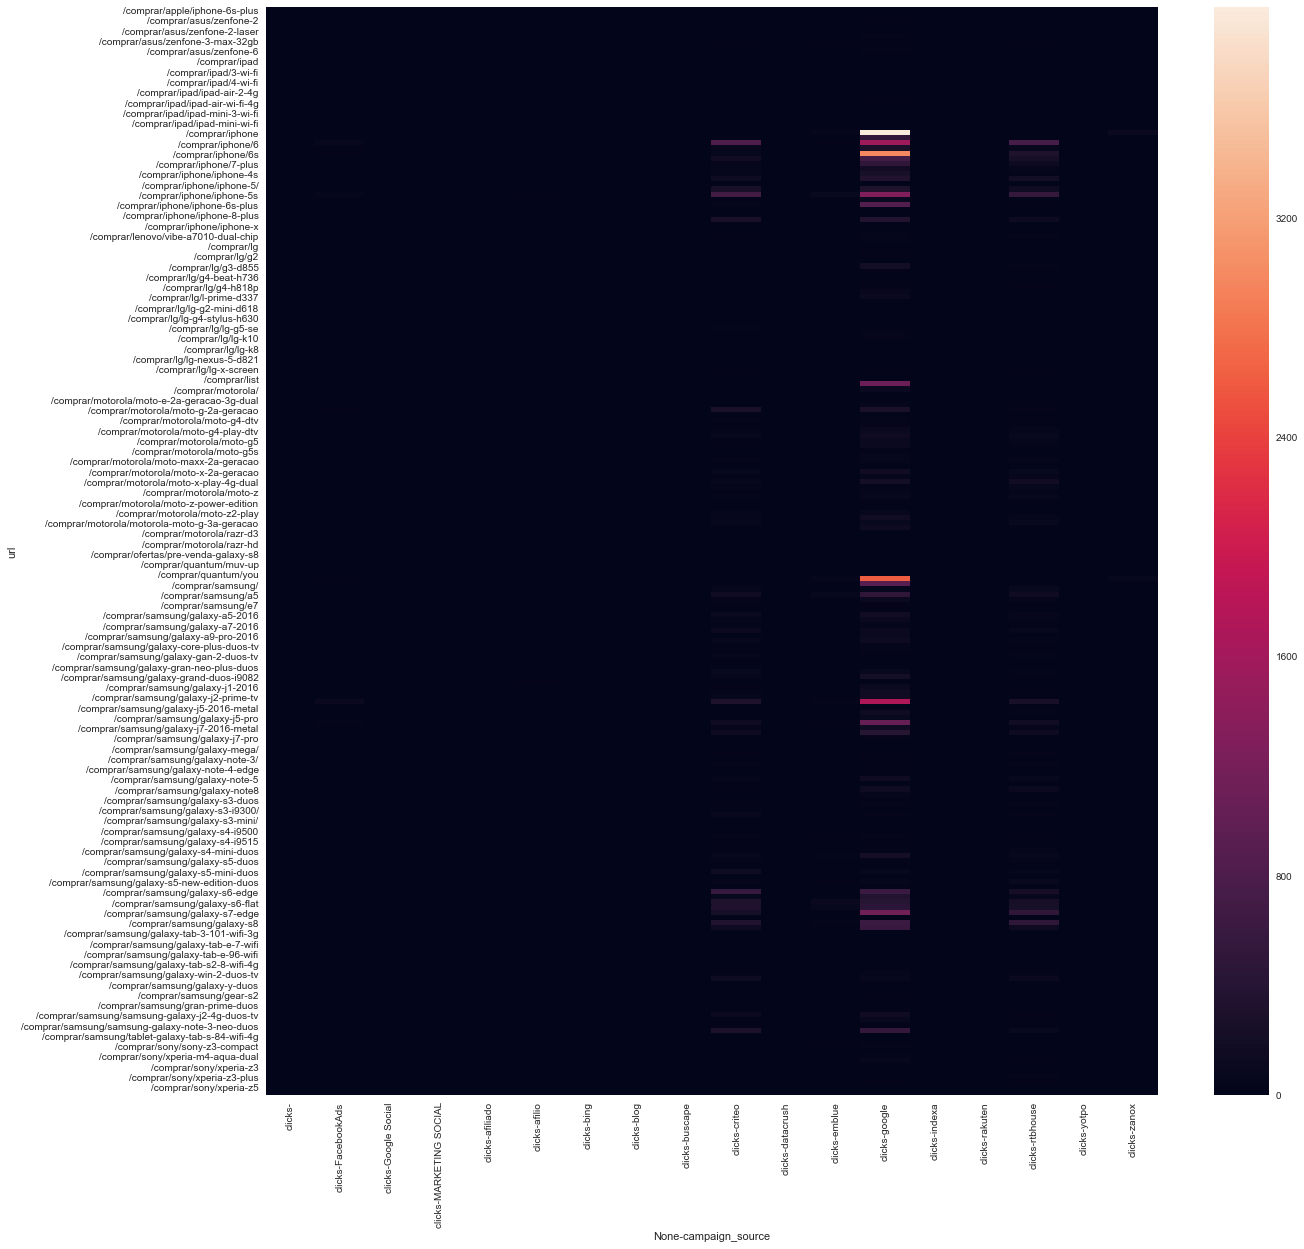

In [95]:
camp = tf[tf.event == 'ad campaign hit']
camp = camp.fillna('')
camp = camp[camp.url.str.contains('comprar')]
camp = camp.groupby('url').campaign_source.value_counts().to_frame('clicks')

camp = camp.unstack('campaign_source').fillna(0)

plt.figure(figsize = (20,20))
sns.heatmap(data = camp)


**2.2.10)CUALES SON LAS PRINCIPALES MARCAS QUE SE QUERIAN COMPRAR Y VENDER

## 2.3) Generic listing

Este evento representa: El usuario visita la homepage.

**2.3.1) ¿Cuáles son los teléfonos más visitados en la página principal?**

In [129]:
# Base de datos SKU => Model
def get_categoria(x):
    pack = x.split('.')
    return pack[0]

viewed_product = tf[tf['event'] == 'viewed product']
viewed_product['sku_real'] = viewed_product.sku.apply(lambda x: get_categoria(x))

productos = viewed_product[['sku_real', 'sku', 'model']]
diccionario = productos[['sku_real', 'model']].set_index('sku_real').to_dict()
# diccionario['model'][12661]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


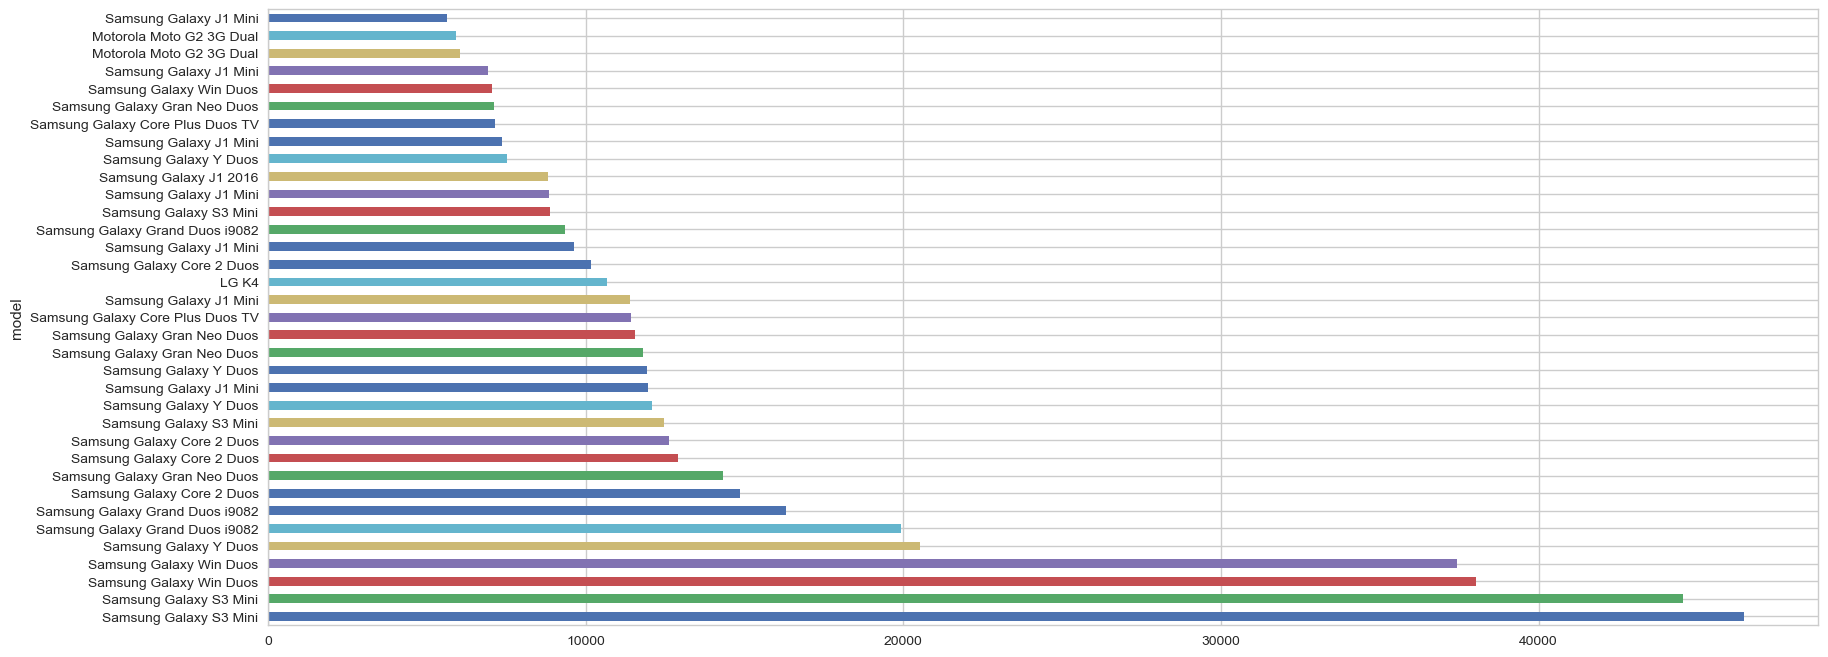

In [131]:
def buscar(x, d):
    if str(x) in d['model']:
        return d['model'][str(x)]
    return 'no'

generic_listing = data[data['event'] == 'generic listing']
generic_listing = generic_listing['skus'].str.split(',', expand = True) # Rompo la lista de Skus y genero una lista para cada sku
generic_listing = generic_listing.stack().to_frame('sku')
skus_mas_visitados = generic_listing.reset_index()['sku'].value_counts().to_frame('Visitas').reset_index()
skus_mas_visitados.columns = ['sku', 'visitas']
skus_mas_visitados['model'] = skus_mas_visitados.sku.apply(lambda x: buscar(x, diccionario))
datos = skus_mas_visitados.set_index('model')
datos.head(35).visitas.plot.barh(figsize = (20, 8))
# datos.plot.bar(x = 'visitas', y = 'model')

**Es importante destacar la predominancia de los dispositivos Samsung en la página principal**

**2.3.2) Cantidad de conversiones en base a las visitas de los productos en la página principal**

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Cantidad de conversiones sobre cantidad de visitas por modelo')

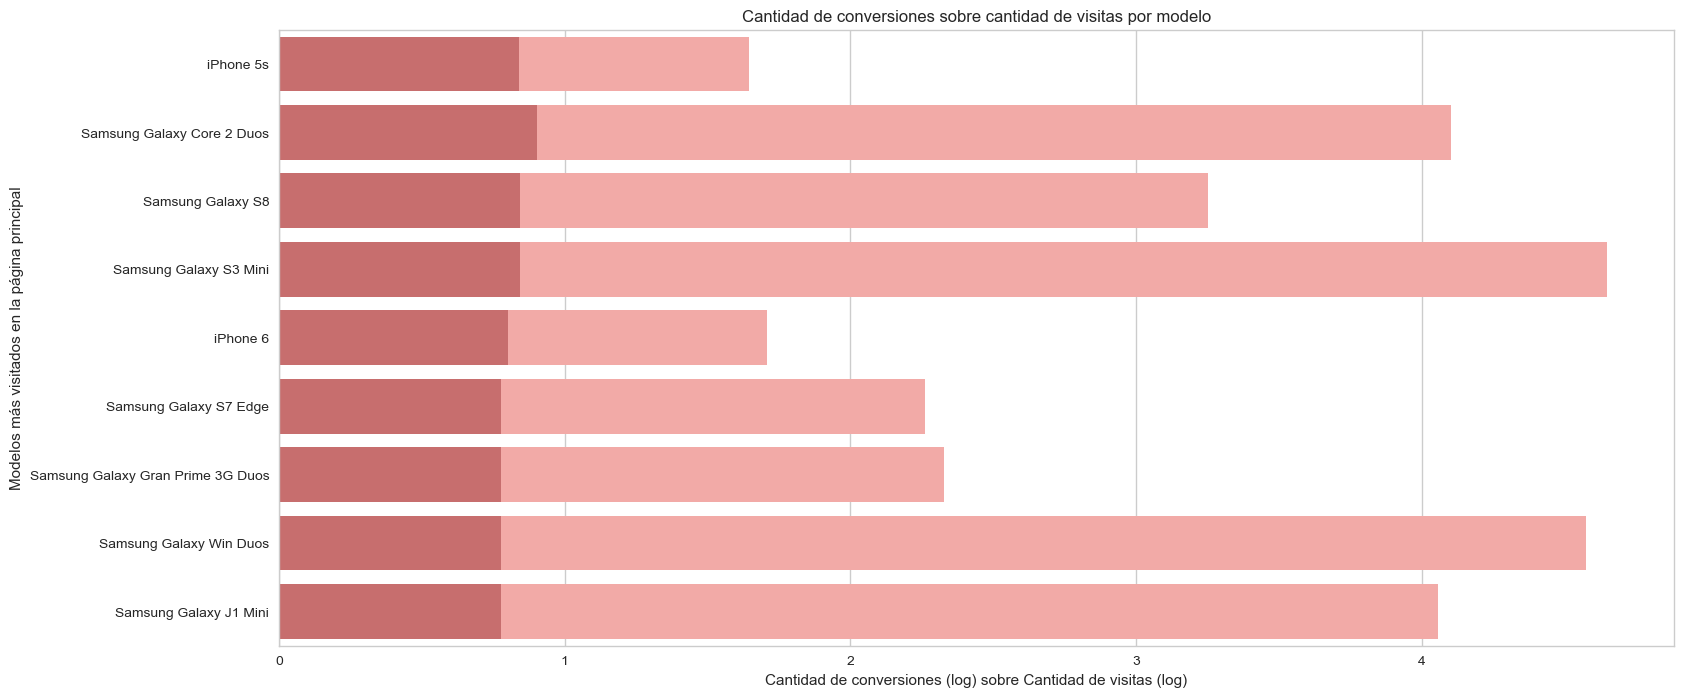

In [133]:
conversiones = data[data.event == 'conversion']
conversiones['sku_real'] = conversiones.sku.apply(lambda x: get_categoria(x))
conversiones = conversiones.sku_real.value_counts().to_frame('conversiones')
conversiones = conversiones.reset_index()
conversiones.columns = ['sku_category', 'conversiones']

skus_mas_visitados.columns = ['sku_category', 'visitas', 'model']
skus_mas_visitados
merge = pd.merge(conversiones, skus_mas_visitados, on = 'sku_category')

merge['visitas_log'] = np.log10(merge['visitas'])
merge['conversiones_log'] = np.log10(merge['conversiones'])
merge = merge.sort_values('conversiones_log', ascending = False).head(12)

#Grafico
plt.figure(figsize = (18, 8))
sns.set_color_codes('pastel')
sns.barplot(data = merge, y = 'model', x = 'visitas_log', color = 'r', ci = None)
sns.set_color_codes('muted')
graf =sns.barplot(data = merge, y = 'model', x = 'conversiones_log', color = 'r', ci = None)
graf.set_xlabel('Cantidad de conversiones (log) sobre Cantidad de visitas (log)')
graf.set_ylabel('Modelos más visitados en la página principal')
graf.set_title('Cantidad de conversiones sobre cantidad de visitas por modelo')

**Si bien existe una predominancia de Samsung en las visitas de la página principal, esto no afecta en las conversiones de Iphone siendo que el Iphone 5s es uno de los productos con más conversiones y con menor cantidad de visitas**

## 2.4) Searched products
Este evento representa: El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


**2.4.1)¿Qué suelen buscar los usuarios?**

In [36]:
searched_products['search_term'].str.lower().value_counts(normalize = True)
# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los Samsung.

iphone 6                                                       0.07
iphone                                                         0.06
iphone 6s                                                      0.05
iphone 7                                                       0.03
iphone 5s                                                      0.02
j7                                                             0.02
motorola                                                       0.02
j5                                                             0.02
s7                                                             0.02
iphone 6 plus                                                  0.02
s8                                                             0.01
iphone se                                                      0.01
samsung                                                        0.01
iphone 6s plus                                                 0.01
iphone 5                                        

In [37]:
text = list(searched_products['search_term'].str.lower().value_counts(normalize = True).index)
text = ' '.join(text)

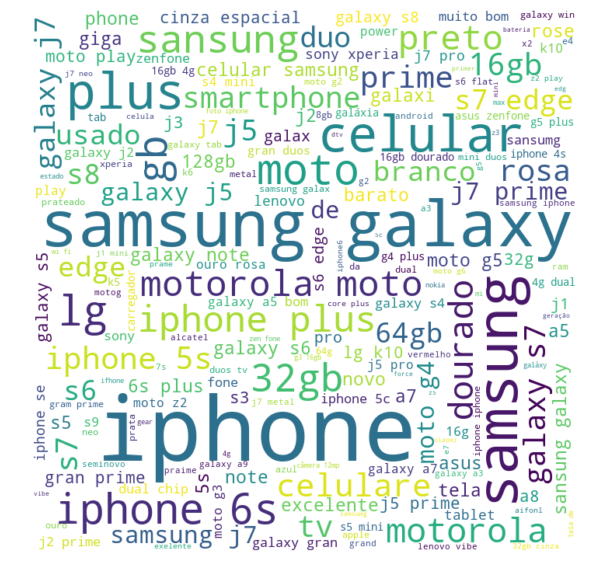

In [43]:
# Libreria wordcloud.
# para bajarsela
from wordcloud import WordCloud

# Lista con las palabras.
text = list(searched_products['search_term'].str.lower().value_counts(normalize = True).index)
text = ' '.join(text)

wordcloud = WordCloud(width=700, height=700, background_color="white").generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


[sacar o no] 

In [ ]:
# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|5c|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

In [ ]:
samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8|j7|j5|j3|note|a3|a5|a7').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 30 % de la busquedas.

In [ ]:
motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

## 2.5) Search engine hit
Este evento representa: El usuario ingresa al sitio mediante un motor de búsqueda web.


**2.5.1)¿Cuáles fueron los motores de busqueda más populares?**

Google                   0.99
Bing                     0.01
Yahoo                    0.01
Ask                      0.00
Name: search_engine, dtype: float64


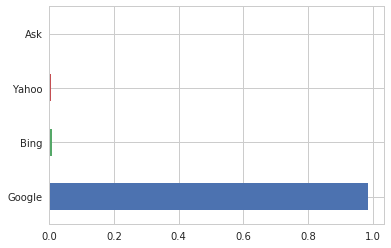

In [46]:
# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine = search_engine_hit['search_engine']
search_engine_v = search_engine.value_counts(normalize = True)
print(search_engine_v)
search_engine_v.plot(kind = "barh")

Podemos ver que el acceso desde otros motores de búsqueda que no son google son despreciables. 

El siguiente grafico se puede ver mejor, pero es muy importante tener en cuenta que tiene escala logaritmica en el eje horizontal.

Text(0,0.5,'Motores de busqueda')

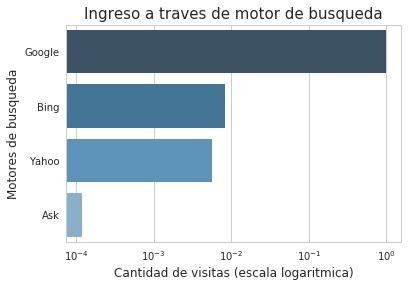

In [47]:
# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_v.values, y=search_engine_v.index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

**2.5.2) ¿Cuáles fueron los ingresos a través de un motor de busqueda en el tiempo?**

Text(0.5,1,'Ingresos a traves de un motor de busqueda en el tiempo')

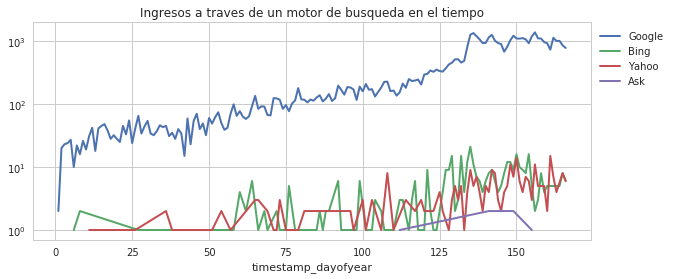

In [48]:
# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine== 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')


## 2.6) Checked out
Este evento representa:  El usuario ingresa al checkout de compra de un producto

**2.6.1)¿Cuáles fueron los modelos que más llegaron a check out?**

iPhone 6                                                      0.10
iPhone 5s                                                     0.08
iPhone 6S                                                     0.07
Samsung Galaxy J5                                             0.06
Samsung Galaxy S7                                             0.04
iPhone 7                                                      0.04
Samsung Galaxy S8                                             0.03
iPhone 7 Plus                                                 0.03
Samsung Galaxy J7 Prime                                       0.03
Samsung Galaxy S6 Flat                                        0.03
Samsung Galaxy S7 Edge                                        0.02
Samsung Galaxy J7                                             0.02
iPhone SE                                                     0.02
iPhone 6 Plus                                                 0.02
iPhone 5c                                                     

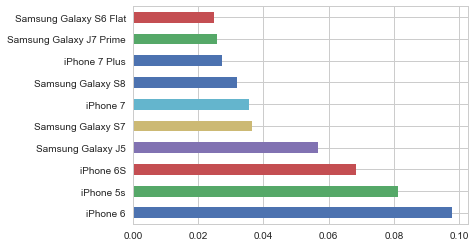

In [147]:
checkout_modelo = checkout['model'].value_counts(normalize = True)
print(checkout_modelo)
checkout_modelo.head(10).plot(kind = 'barh')
 



**2.6.2)¿Cuáles fueron los almacenamientos de los modelos que más llegaron a check out?** 

16GB                    0.37
32GB                    0.29
64GB                    0.16
8GB                     0.11
128GB                   0.05
4GB                     0.01
256GB                   0.01
512MB                   0.00
Name: storage, dtype: float64


Text(0,0.5,'Porcentaje de checkouts')

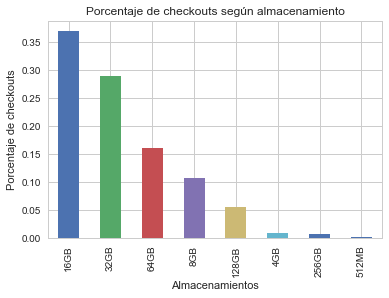

In [150]:
checkout_almacenamiento = checkout['storage'].value_counts(normalize = True)
print(checkout_almacenamiento)
checkout_almacenamiento = checkout_almacenamiento.plot(kind = 'bar')
checkout_almacenamiento.set_title('Porcentaje de checkouts según almacenamiento')
checkout_almacenamiento.set_xlabel('Almacenamientos')
checkout_almacenamiento.set_ylabel('Porcentaje de checkouts')


Estos porcentajes coinciden con los obtenidos en viewed product (2.1.3)

**2.6.3)¿Cuáles fueron los colores de los modelos que más llegaron a check out?**


Text(0,0.5,'color')

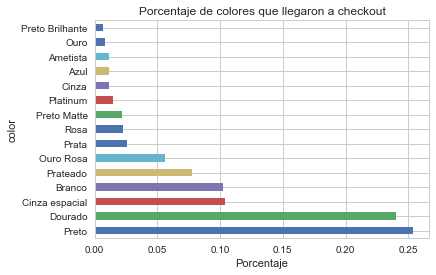

In [152]:
checkout_color = checkout['color'].value_counts(normalize = True)
checkout_color = checkout_color.head(15).plot(kind = 'barh')
checkout_color.set_title('Porcentaje de colores que llegaron a checkout')
checkout_color.set_xlabel('Porcentaje')
checkout_color.set_ylabel('color')

Estos porcentajes coinciden con los obtenidos en viewed product (2.1.2). 

**2.6.4) ¿Cuáles fueron las condiciones de los modelos que llegaron a check out?**

Bom                                  0.45
Excelente                            0.27
Muito Bom                            0.24
Bom - Sem Touch ID                   0.03
Novo                                 0.00
Name: condition, dtype: float64


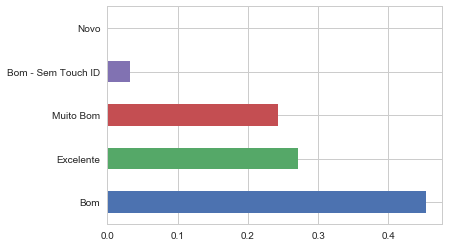

In [153]:
checkout_condition = checkout['condition'].value_counts(normalize = True)
print(checkout_condition)
checkout_condition.head(15).plot(kind = 'barh')

Estos porcentajes coinciden con los obtenidos en viewed product (2.1.4) 

** 2.6.5) ¿Como varian los checkout en los dias del año? **

Text(0,0.5,'Eventos de checkout')

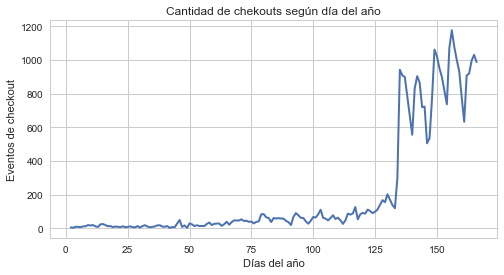

In [154]:
grafico = checkout.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))
grafico.set_title('Cantidad de chekouts según día del año')
grafico.set_xlabel('Días del año')
grafico.set_ylabel('Eventos de checkout')

## 2.7) Visited site

Este evento representa: El usuario ingresa al sitio a una determinada url

**2.7.1)¿Es representativo el pais marcado como Unknown?**

In [14]:
visited_site['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Romania                   7
Portugal                  7
Dominican Republic        6
Guadeloupe                6
Russia                    6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Philippines               1
Algeria                   1
Saudi Arabia              1
Israel                    1
Cape Verde                1
Belize                    1
Ireland                   1
Zimbabwe                  1
Peru                      1
Spain               

Podemos ver que si bien es el segundo pais mas popular, este se puede despreciar debido a la gran diferencia con Brazil. Ademas es necesario deshacernos de estos valores para poder hacer un analisis.

In [15]:
visited_site.loc[visited_site['country'] != 'Unknown']['city'].value_counts()

Unknown                       13506
São Paulo                     11711
Rio de Janeiro                 3538
Belo Horizonte                 2568
Salvador                       2314
Brasília                       1530
Osasco                         1148
Curitiba                       1132
Fortaleza                      1084
Recife                          913
Goiânia                         853
Porto Alegre                    799
Guarulhos                       776
São Bernardo do Campo           716
Belém                           640
São Luís                        597
Manaus                          507
Natal                           487
Montes Claros                   482
Campinas                        471
Barueri                         466
Santo André                     434
Duque de Caxias                 429
Petrolina                       424
Teresina                        388
Sorocaba                        376
Campo Grande                    373
Maceió                      

In [16]:
# Los saco para poder analizar lo demas.
visited_site_geo = visited_site.loc[(visited_site['country'] != 'Unknown') & (visited_site['city'] != 'Unknown') & \
                                   (visited_site['region'] != 'Unknown')]

**2.7.2)¿Cuántas fueron las visitas por país?**

In [17]:
# Visitas por pais.
visited_site_geo_country = visited_site_geo['country']
visited_site_geo_country.value_counts()
# Practicamente todas las visitas fueron de Brazil.

Brazil                70935
United States           407
Argentina                86
Canada                   31
Japan                    11
United Kingdom           10
Netherlands               9
Poland                    9
Mozambique                8
Portugal                  7
Romania                   7
Dominican Republic        6
Italy                     4
Switzerland               3
France                    3
Paraguay                  2
Germany                   2
India                     2
Russia                    2
Uruguay                   1
China                     1
Venezuela                 1
Sri Lanka                 1
South Africa              1
Mexico                    1
Turkey                    1
Bangladesh                1
Morocco                   1
Name: country, dtype: int64

**2.7.3)¿Cuántas fueron las visitas por ciudad?**

In [18]:
# Visitas por ciudad.
visited_site_geo_city = visited_site_geo['city']
visited_site_geo_city.value_counts()

São Paulo                11711
Rio de Janeiro            3538
Belo Horizonte            2568
Salvador                  2314
Brasília                  1530
Osasco                    1148
Curitiba                  1132
Fortaleza                 1084
Recife                     913
Goiânia                    853
Porto Alegre               799
Guarulhos                  776
São Bernardo do Campo      716
Belém                      640
São Luís                   597
Manaus                     507
Natal                      487
Montes Claros              482
Campinas                   471
Barueri                    466
Santo André                434
Duque de Caxias            429
Petrolina                  424
Teresina                   388
Sorocaba                   376
Campo Grande               373
Maceió                     370
Contagem                   348
Nova Iguaçu                311
Carapicuiba                296
                         ...  
Campo Novo                   1
Sao Joao

**2.7.4)¿Cuántas fueron las visitas por región?**

In [19]:
# Visitas por region.
visited_site_geo_region = visited_site_geo['region']
visited_site_geo_region.value_counts()

Sao Paulo                           24737
Minas Gerais                         7692
Rio de Janeiro                       6749
Bahia                                5693
Pernambuco                           2932
Ceara                                2776
Parana                               2587
Rio Grande do Sul                    2540
Federal District                     1684
Goias                                1529
Santa Catarina                       1505
Para                                 1296
Maranhao                             1289
Espirito Santo                       1250
Rio Grande do Norte                  1052
Paraíba                               868
Piaui                                 815
Alagoas                               751
Mato Grosso do Sul                    617
Tocantins                             592
Amazonas                              586
Mato Grosso                           476
Sergipe                               396
Rondonia                          

**2.7.5)¿Cuántas fueron las visitas por estado?**

In [20]:
# Visitas por estado.

# Saco los acentos y pongo todo en minuscula.

estados_br = visited_site_geo_region.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
estados_br = estados_br.str.lower()

In [21]:
# Me quedo solo con los estados de Brasil.
lista_estados_br = ['acre', 'alagoas', 'amapa', 'la amazonas', 'bahia', 'ceara', 'espiritu santo', 'goias', 'maranhao', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'para', 'paraiba', 'parana', 'pernambuco', 'piaui', 'rio de janeiro', 'rio grande do norte', 'rio grande do sul', 'rondonia', 'roraima', 'santa catarina', 'sao paulo', 'sergipe', 'tocantins']
estados_br = estados_br.loc[estados_br.isin(lista_estados_br)]
estados_br.value_counts()


sao paulo              24737
minas gerais            7692
rio de janeiro          6749
bahia                   5693
pernambuco              2932
ceara                   2776
parana                  2587
rio grande do sul       2540
goias                   1529
santa catarina          1505
para                    1296
maranhao                1289
rio grande do norte     1052
paraiba                  868
piaui                    815
alagoas                  751
mato grosso do sul       617
tocantins                592
mato grosso              476
sergipe                  396
rondonia                 216
amapa                    144
acre                      96
roraima                   67
Name: region, dtype: int64

In [22]:
df_br = estados_br.value_counts(normalize = True).to_frame()
df_br.index = ['SP', 'MG', 'RJ', 'BA', 'PE',
       'CE', 'PR', 'RS', 'GO', 'SC',
       'PA', 'MA', 'RN', 'PB', 'PI',
       'AL', 'MS', 'TO', 'MT', 'SE',
       'RO', 'AP', 'AC', 'RR']
df_br.reset_index(inplace = True)
df_br.columns = ['estado','cant_visitas']


import folium as folium
import json

map = folium.Map(location=[-10.721869, -51.406479], zoom_start=3.5)

map.choropleth(
    geo_data='Brasil.json',
    name='choropleth',
    data=df_br,
    columns=['estado', 'cant_visitas'],
    key_on='properties.UF',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name='Cant. visitas'
)


folium.LayerControl().add_to(map)

map

**2.7.6) ¿Cuál es el uso de los canales por visita?**

* Display: Interacciones con un medio de "display" o "cpm". También incluye las interacciones de Google Ads con la red de distribución de anuncios configuradas como "content".

* Paid Search: Tráfico desde la red de motores de búsqueda, con un medio de "cpc" o "ppc".

* Other: Sesiones etiquetadas con un medio de "cpc", "ppc", "cpm", "cpv", "cpa", "cpp" o "affiliate" (excluida la publicidad en buscadores).

* Organic Search: Tráfico de búsqueda gratuita en cualquier motor de búsqueda.

* Social Network: Tráfico de cualquiera de las aproximadamente 400 redes sociales (que no están etiquetadas como anuncios).

* Referral: Tráfico de sitios web que no son redes sociales.

* Email: Sesiones que están etiquetadas con el medio de "email".

* Direct: Sesiones en las que el usuario ha escrito la URL del sitio web en el navegador o ha llegado al sitio a través de un marcador.

In [73]:
visited_site.channel.value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

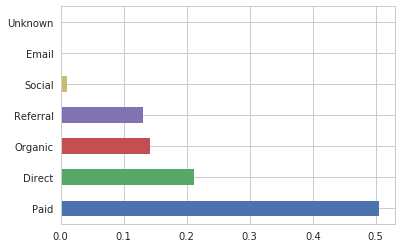

In [72]:
visited_site.channel.value_counts(normalize = True).plot(kind = "barh")

**2.7.7)¿Cuánta gente es nueva? ¿Cuánta gente volvió?**

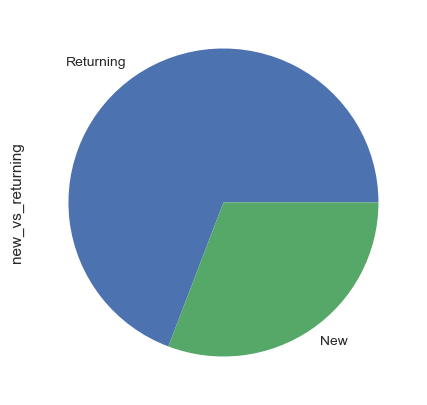

In [136]:
newVsRetruningGraf = visited_site.new_vs_returning.value_counts(normalize = True)
#print(newVsRetruningGraf)
newVsRetruningGraf.plot.pie(figsize = (5, 5))

  -El 69% de la gente volvió
  
  -El 39% de la gente es nueva

**2.7.8)¿Desde qué dispositivo accedieron los usuarios?**

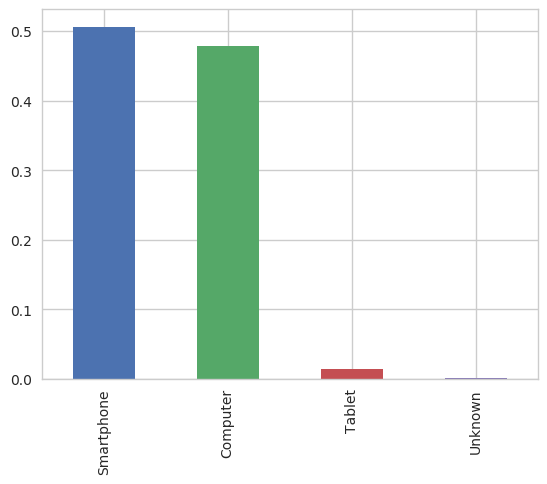

In [85]:
deviceTypeGraf = visited_site.device_type.value_counts(normalize = True)
#print(deviceTypeGraf)
deviceTypeGraf.plot(kind = "bar")

    -El 50% accede desde su teléfono
    -El 47% accede desde su computadora
    -El 1% accedde desde su tablet

**2.7.9)¿Desde qué sistema operativo accedieron los usuarios?**

In [86]:
operatingSystemVersion = visited_site.operating_system_version
operatingSystemVersion.value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
iOS 5.0.1                 2
Mac OS X 10.10            2
Ubuntu 10.4               2
Mac OS X 10.11.3          2
Chrome OS 10176.66  

Text(0,0.5,'Sistemas Operativos')

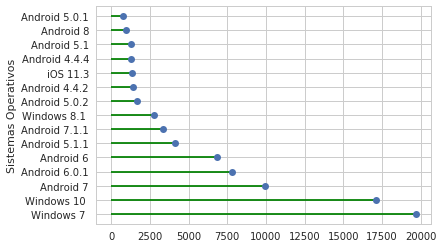

In [131]:
# ALTERNATIVA AL BARPLOT CLASICO!! quizas conviene usarlo cuando son muchos los elementos.
plt.hlines(y=operatingSystemVersion.value_counts().head(15).index, xmin=0, xmax=operatingSystemVersion.value_counts().head(15).values, color='green')
plt.plot(operatingSystemVersion.value_counts().head(15).values, operatingSystemVersion.value_counts().head(15).index, "o")
 
plt.ylabel('Sistemas Operativos')

**2.7.10)¿Desde qué version de Windows accedieron los usuarios?**

Text(0,0.5,'Versiones de Windows')

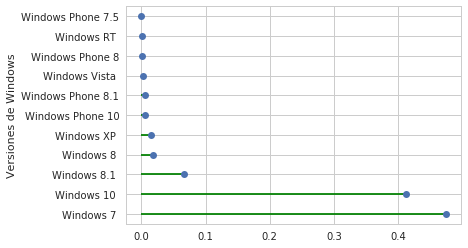

In [129]:
usuariosDeWindows = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Windows')].value_counts(normalize = True)
#usuariosDeAndroid = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Android')].value_counts()
#usuariosDeIos = operatingSystemVersion.loc[operatingSystemVersion.str.contains('iOS')].value_counts()
#usuariosDeLinux = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Linux')].value_counts()
#usuariosDeMac = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Mac')].value_counts()

# NO CREO QUE TENGA SENTIDO REPETIR ESTE ANALISIS PARA TODOS LOS S.O . Seria repetir mucho, decidan si quieren
# sacarlo.

plt.hlines(y=usuariosDeWindows.head(15).index, xmin=0, xmax=usuariosDeWindows.head(15).values, color='green')
plt.plot(usuariosDeWindows.values, usuariosDeWindows.head(15).index, "o")
 
plt.ylabel('Versiones de Windows')

## 2.8) Conversion
Este evento representa:  El usuario realiza una conversión, comprando un producto

**2.8.1)¿Cuáles fueron los productos más comprados?**

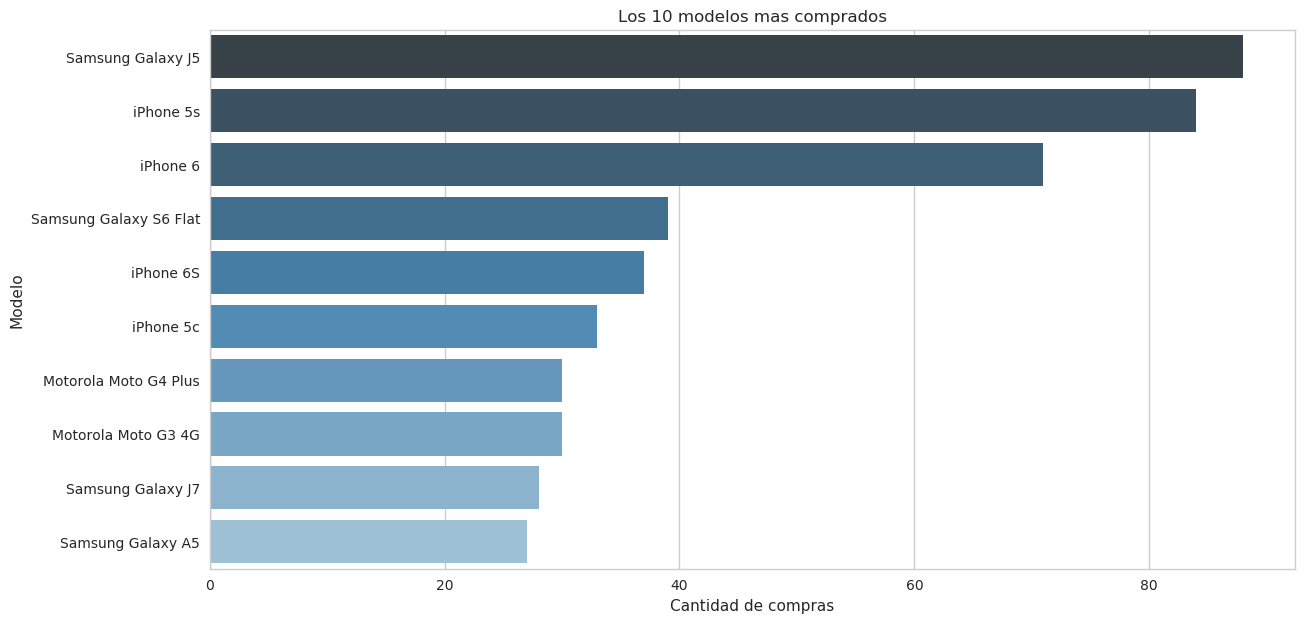

In [87]:
tf_event_mod = conversion.filter(items = ['event', 'model'])
fig, ax = plt.subplots(figsize=(14,7))
mas_comp = tf_event_mod['model'].value_counts().head(10)
g = sns.barplot(y=mas_comp.index, x=mas_comp.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de compras', ylabel='Modelo', title='Los 10 modelos mas comprados');

**2.8.2)¿Cuál fue la cantidad de productos más comprados según su condición?**

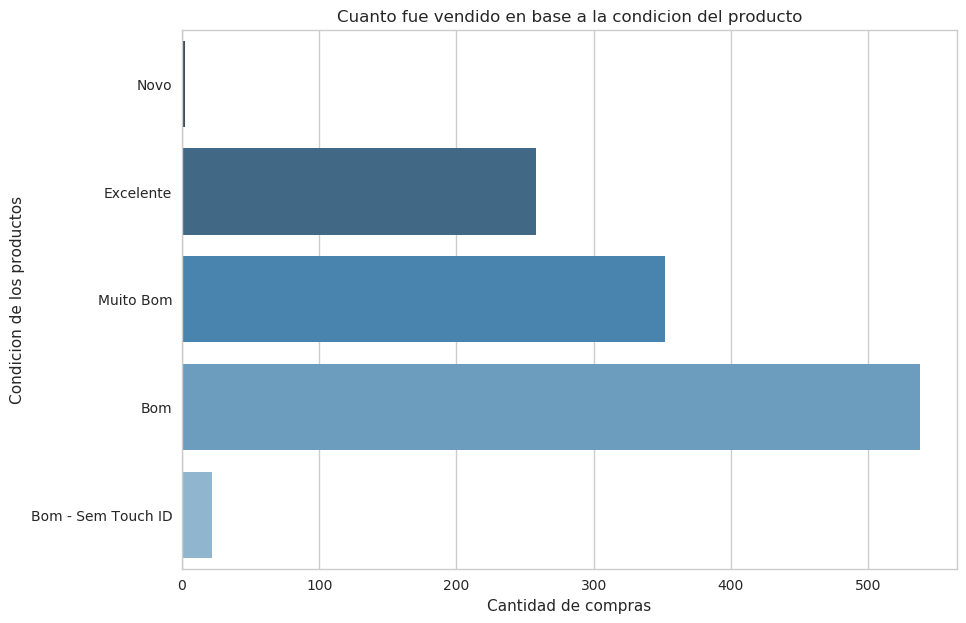

In [88]:
qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
condition = conversion['condition'].value_counts().reindex(qual)
fig, ax = plt.subplots(figsize=(10,7))
g = sns.barplot(y=condition.index, x=condition.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de compras', ylabel='Condicion de los productos', title='Cuanto fue vendido en base a la condicion del producto');

Cabe destacar que antes de comparar las ventas en base a las condiciones del produto, se deberia tener en cuenta cuantos productos de cada condicion posee la pagina.

**2.8.3)¿Cuál fue la cantidad de almacenamiento que más se vendió? ¿Coincide con viewed product?**

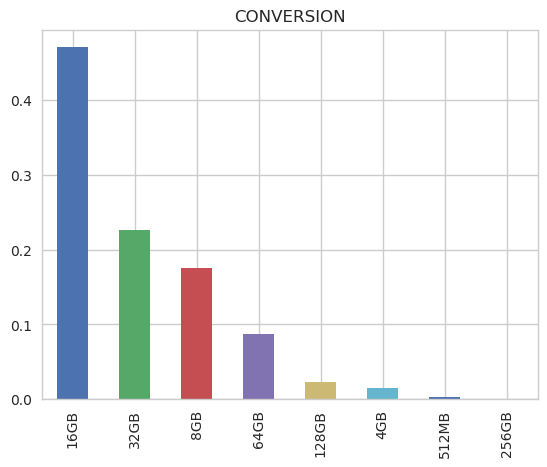

In [89]:
conversion_storage = conversion.storage.value_counts(normalize = True)
g = conversion_storage.plot(kind = 'bar')
g = g.set_title('CONVERSION')

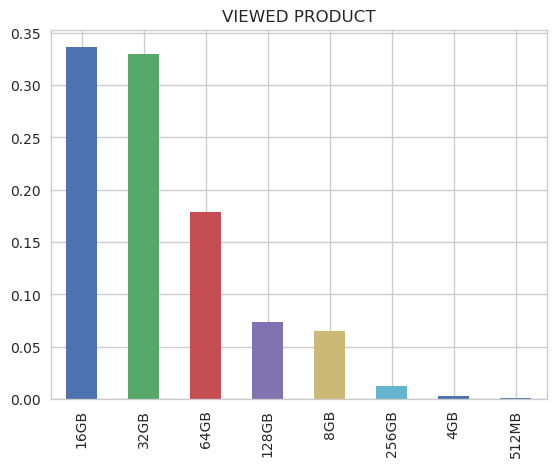

In [90]:
g = viewed_product.storage.value_counts(normalize = True).plot(kind = 'bar')
g = g.set_title('VIEWED PRODUCT')

Se puede ver que la proporción de gente que buscó dispositivos de 32 gb no es la misma que la proporción de la gente que compró de 32 gb. ¿Será por el precio? **Estaría bueno hacer un análisis que según las personas que vieron productos de 32 gb compraron los mismos** *** ESTO SE SACA ?? ***

**2.8.4)¿Cuál fue la calidad del producto que más se vendió?¿Coincide con viewed product?**

Text(0.5,1,'CONVERSION')

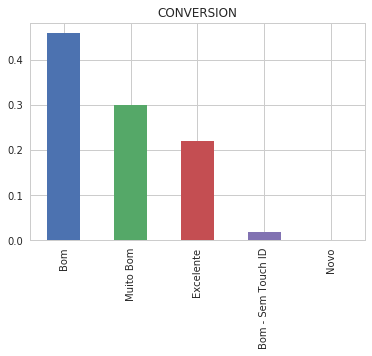

In [91]:
conversion_condition = conversion.condition.value_counts(normalize = True)
conversion_condition.plot(kind = 'bar').set_title('CONVERSION')

Text(0.5,1,'VIEWED PRODUCT')

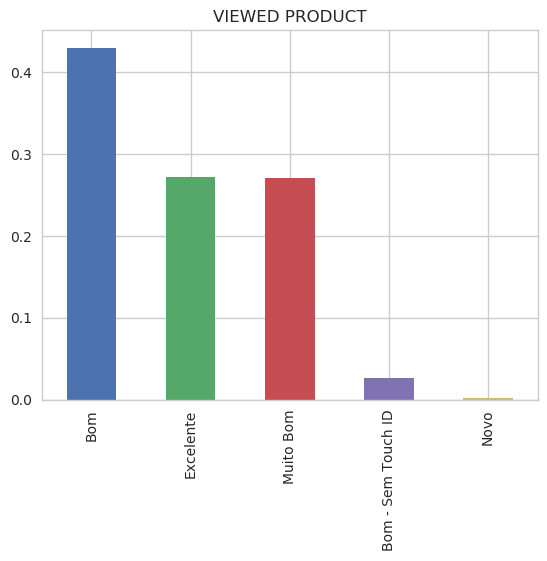

In [92]:
viewed_product.condition.value_counts(normalize = True).plot(kind = 'bar').set_title('VIEWED PRODUCT')

Se puede ver que la proporción de gente que buscó dispositivos de calidad excelente no es la misma que la proporción de la gente que compró de calidad excelente. ¿Será por el precio? **Estaría bueno hacer un análisis que según las personas que vieron productos de calidad excelente y compraron los mismos**

**2.8.5)¿Cuál es el color del producto que más se vendió?¿Coincide con viewed product?**

Text(0.5,1,'CONVERSION')

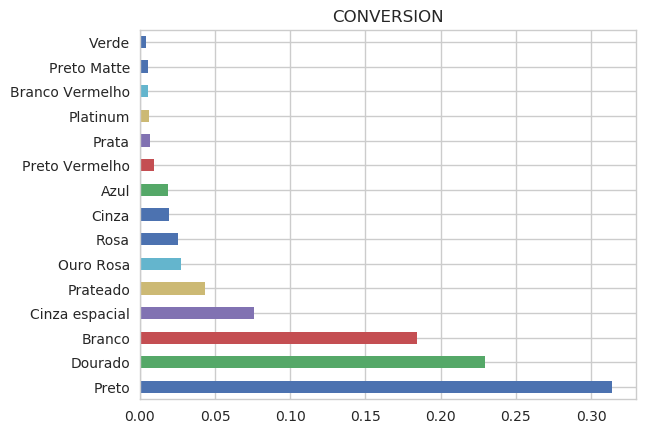

In [93]:
conversion_color = conversion.color.value_counts(normalize = True).head(15).plot(kind = 'barh').set_title('CONVERSION')
conversion_color

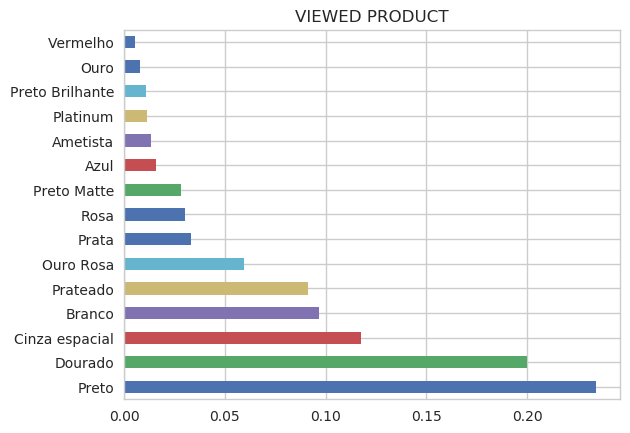

In [94]:
viewed_product = viewed_product.color.value_counts(normalize = True).head(15).plot(kind = 'barh').set_title('VIEWED PRODUCT')

Acá sucede lo mismo que antes: las proporción de personas que vieron cianza espacial no es la misma que lo compró, más personas prefirieron el blanco. 

** CREO QUE SERIA MEJOR PONER ESTE ANALISIS EN LA PARTE 3, CON UN GRAFICO DE BARPLOTS SUPERPUESTOS COMO EL QUE VI POR AHI EN UN NOTEBOOK DE LUCAS  ** 

# ¿Cuáles son las marcas con mayores conversiones por semana del año?

In [102]:
conv = tf[tf['event'] == 'conversion']
conv['marca'] = conv.model.apply(lambda x: str(x).split(" ")[0])
conv.marca.value_counts()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Samsung     641
iPhone      323
Motorola    149
Sony         23
LG           20
Lenovo       14
Asus          2
Name: marca, dtype: int64

Text(0.5,1,'Ventas por marca por semana del año')

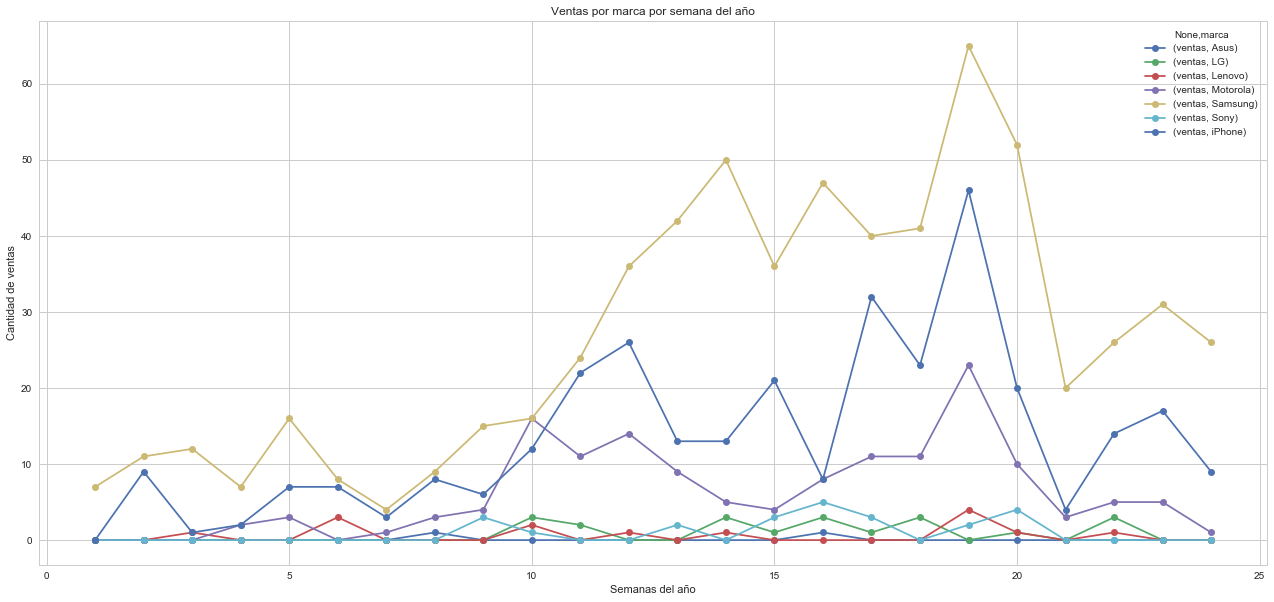

In [103]:
conv = conv.groupby('timestamp_week').marca.value_counts().to_frame('ventas')
graf = conv.unstack('marca').fillna(0).plot(kind = 'line', figsize = (22, 10), style = '-o')
graf.set_xlabel('Semanas del año')
graf.set_ylabel('Cantidad de ventas')
graf.set_title('Ventas por marca por semana del año')

## 2.9) Staticpage
Este evento representa: El usuario visita una página

## 2.10) Lead
Este evento representa: El usuario se registra para recibir una notificación de disponibilidad de stock, para un producto que no se encontraba disponible en ese momento.


**2.10.1)¿Cuáles fueron los modelos no disponibles con más pedidos de notificación de stock?**

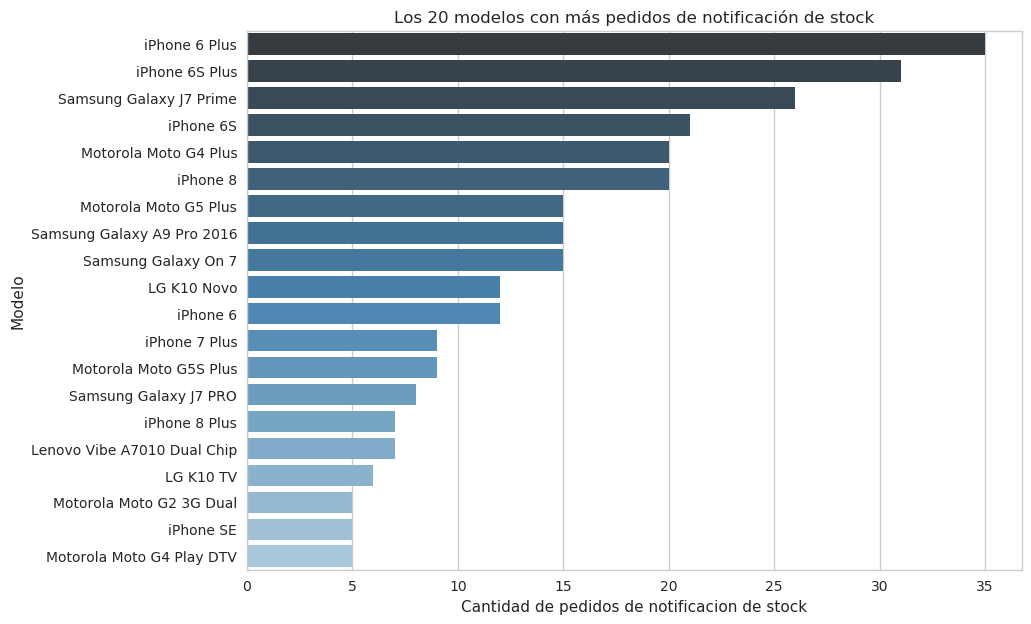

In [95]:
tf_event_mod = tf.filter(items = ['event', 'model'])
mas_pedidos = tf_event_mod.loc[tf_event_mod['event'] == 'lead']['model'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(10,7))
g = sns.barplot(y=mas_pedidos.index, x=mas_pedidos.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de pedidos de notificacion de stock', ylabel='Modelo',\
      title='Los 20 modelos con más pedidos de notificación de stock');

**2.10.2) ¿Qué porcentaje de productos agregados a Lead fueron comprados por la misma persona? **

In [126]:
filtro = tf[(tf.event == 'conversion') | (tf.event == 'lead')]
filtro = filtro.groupby(['person', 'model']).event.value_counts().to_frame('cantidad')

filtro = filtro.unstack().fillna(0)

filtro = filtro.reset_index()
filtro.columns = ['person', 'model', 'conversion', 'lead']
filtro = filtro[filtro.lead > 0]
filtro.sum()
# # filtro[['conversion', 'lead']].sum().to_frame('magnitudes').plot.pie(y = 'magnitudes', figsize = (8, 8), colors = ['#EE4266', '#FFD23F'])

# filtro

person        0113991901bca04301db2fe603767f8e03bdcd8103d11a...
model         Samsung Galaxy On 7iPhone 6 PlusSamsung Galaxy...
conversion                                                36.00
lead                                                     448.00
dtype: object

El 8% de las veces que un producto es agregado a **Lead** termina siendo comprado (ya sea por causa del Lead o por causa externa, no podemos determinarlo)

Este 8% es un valor máximo y no exacto, ya que la persona pudo haber comprado el producto por causas externas a la notificación del Lead. Incluso la persona pudo haber comprado el producto antes de haberlo agregado al Lead (cosa que no tiene sentido pero es posible)

## 2.11) Brand listing

Brand Listing visita un conjuto especifico de una marca y muestrasus productos.

Siendo que los productos están como una lista en el campo SKUs, voy a quedarme con cada uno de los productos por separado

Voy a tomar cada uno de los productos que son visitados a partir de la marca y establecer cuáles se visitan más cantidad de veces

In [63]:
brand_listing = tf[tf['event'] == 'brand listing']
columna_pivote = 'person' # Elijo la columna por la cual voy a agrupar
lista3 = brand_listing['skus'].str.split(',', expand = True) # Rompo la lista de Skus y genero una lista para cada sku
lista3[columna_pivote] = brand_listing[columna_pivote] # Guardo este resultado en el dataframe original

lista3 = lista3.set_index(columna_pivote).stack().to_frame() # Convierno cada elemento de la lista de Skus en una unica fila
lista3 = lista3.reset_index() 
lista3.columns = [columna_pivote, 't', 'sku_category'] # Renombro las columnas
lista3 = lista3.dropna(subset = ['sku_category']) #Elimino los skus que son nulos
lista3 = lista3.groupby(['sku_category']).size().to_frame('vistas')
lista3 = lista3.reset_index()

lista3.head()

,sku_category,vistas
0,10001,27
1,10002,116
2,10014,187
3,10015,65
4,10016,535


Establezco un diccionario para conocer qué modelos son los más visitados

In [88]:
data = tf
data['sku_real'] = data.sku.apply(lambda x: str(x))
data['caso'] = data.sku_real.apply(lambda x: len(x.split('.')))
data['sku_category'] = data.sku_real.apply(lambda x: x.split('.')[0])

lista_productos = data[['sku_category', 'model']]
lista_productos = lista_productos.drop_duplicates('sku_category')
dict = lista_productos.set_index('sku_category').to_dict()


In [93]:
def buscar(x):
    global dict
    if x in dict:
        return 'jo'
    else:
        return 'N/A'

lista3['model'] = lista3.sku_category.apply(lambda x: buscar(x))

lista3.model.value_counts()

N/A    1769
Name: model, dtype: int64